# Face Reg Notebook

## Necessary libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Checking our data

In [2]:
ls data\female

 Volume in drive C is Windows
 Volume Serial Number is BCBE-FE20

 Directory of C:\Users\liamc\freeai\Module-2\data\female

15/02/2021  13:12    <DIR>          .
15/02/2021  13:12    <DIR>          ..
15/02/2021  13:08            36ÿ906 female_000000.jpg
15/02/2021  13:08            36ÿ484 female_000001.jpg
15/02/2021  13:08            26ÿ696 female_000002.jpg
15/02/2021  13:08             4ÿ741 female_000003.jpg
15/02/2021  13:08            19ÿ446 female_000004.jpg
15/02/2021  13:08             5ÿ356 female_000005.jpg
15/02/2021  13:08             6ÿ837 female_000006.jpg
15/02/2021  13:08             3ÿ652 female_000007.jpg
15/02/2021  13:08             9ÿ722 female_000008.jpg
15/02/2021  13:08             4ÿ826 female_000009.jpg
15/02/2021  13:08             8ÿ301 female_000010.jpg
15/02/2021  13:08             1ÿ986 female_000011.jpg
15/02/2021  13:08             5ÿ047 female_000012.jpg
15/02/2021  13:08            36ÿ779 female_000013.jpg
15/02/2021  13:08            21ÿ226 female_

### Organizing and naming our data/ images

In [2]:
from glob import glob

In [5]:
female_path = glob('../raw_data/female/*.jpg')

In [6]:
female_path

['../raw_data/female\\female_000000.jpg',
 '../raw_data/female\\female_000001.jpg',
 '../raw_data/female\\female_000002.jpg',
 '../raw_data/female\\female_000003.jpg',
 '../raw_data/female\\female_000004.jpg',
 '../raw_data/female\\female_000005.jpg',
 '../raw_data/female\\female_000006.jpg',
 '../raw_data/female\\female_000007.jpg',
 '../raw_data/female\\female_000008.jpg',
 '../raw_data/female\\female_000009.jpg',
 '../raw_data/female\\female_000010.jpg',
 '../raw_data/female\\female_000011.jpg',
 '../raw_data/female\\female_000012.jpg',
 '../raw_data/female\\female_000013.jpg',
 '../raw_data/female\\female_000014.jpg',
 '../raw_data/female\\female_000015.jpg',
 '../raw_data/female\\female_000016.jpg',
 '../raw_data/female\\female_000017.jpg',
 '../raw_data/female\\female_000018.jpg',
 '../raw_data/female\\female_000019.jpg',
 '../raw_data/female\\female_000020.jpg',
 '../raw_data/female\\female_000021.jpg',
 '../raw_data/female\\female_000022.jpg',
 '../raw_data/female\\female_00002

In [7]:
male_path = glob('../raw_data/male/*.jpg')

In [8]:
male_path

['../raw_data/male\\male_000000.jpg',
 '../raw_data/male\\male_000001.jpg',
 '../raw_data/male\\male_000002.jpg',
 '../raw_data/male\\male_000003.jpg',
 '../raw_data/male\\male_000004.jpg',
 '../raw_data/male\\male_000005.jpg',
 '../raw_data/male\\male_000006.jpg',
 '../raw_data/male\\male_000007.jpg',
 '../raw_data/male\\male_000008.jpg',
 '../raw_data/male\\male_000009.jpg',
 '../raw_data/male\\male_000010.jpg',
 '../raw_data/male\\male_000011.jpg',
 '../raw_data/male\\male_000012.jpg',
 '../raw_data/male\\male_000013.jpg',
 '../raw_data/male\\male_000014.jpg',
 '../raw_data/male\\male_000015.jpg',
 '../raw_data/male\\male_000016.jpg',
 '../raw_data/male\\male_000017.jpg',
 '../raw_data/male\\male_000018.jpg',
 '../raw_data/male\\male_000019.jpg',
 '../raw_data/male\\male_000020.jpg',
 '../raw_data/male\\male_000021.jpg',
 '../raw_data/male\\male_000022.jpg',
 '../raw_data/male\\male_000023.jpg',
 '../raw_data/male\\male_000024.jpg',
 '../raw_data/male\\male_000025.jpg',
 '../raw_dat

In [9]:
len(male_path), len(female_path)

(7000, 7000)

## Taking a look at one of our images

In [10]:
path = female_path[0]
img = cv2.imread(path)

In [11]:
img.shape

(489, 490, 3)

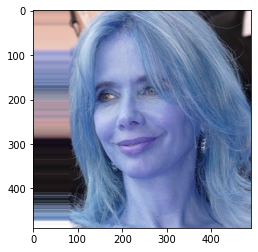

In [12]:
plt.imshow(img)

**Lets look at it in grayscale**

In [13]:
#convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(489, 490)

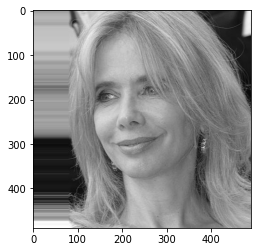

In [14]:
plt.imshow(gray, cmap = 'gray')

## We now want to create a way to crop the face from all the images we have

### Lets use cascade Classifier to properly identify the faces !


In [15]:
haar = cv2.CascadeClassifier('../raw_data/model/haarcascade_frontalface_default.xml')

In [16]:
faces = haar.detectMultiScale(gray, 1.5, 5)

In [17]:
print(faces)

[[ 86  86 273 273]]


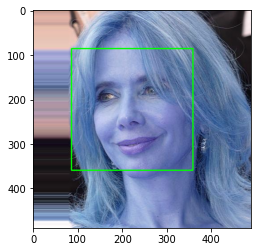

In [18]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [18]:
# w e h representam widht e height da imagem. como podemos ver o modelo está a funcionar e a identificar de forma correta
#a cara da pessoa

## Agora que localizamos a cara podemos recortar apenas a cara para o nosso modelo poder treinar

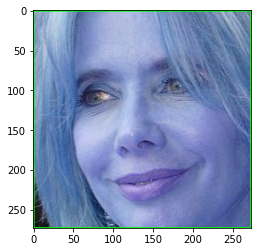

In [19]:
crop_img = img[y:y+h,x:x+w]
plt.imshow(crop_img)

## Agora vamos guardar a imagem

In [20]:
cv2.imwrite('f_01.png', crop_img)

True

## Agora como aplicar este procedimento para todas as fotos de forma automática?

In [21]:
def extract_images(path, gender, i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray, 1.5, 5)
    for x,y,w,h in faces:
        cropped_face = img[y:y+h, x:x+w]
        if gender == 'male':
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender, i), cropped_face)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender, i), cropped_face)

In [22]:
for i,path in enumerate(female_path):
    try:
        extract_images(path,'female', i)
        print('INFO {}/{} processed sucessfully'.format(i,len(female_path)))
    except:
        print('INFO {}/{} cannot be processed sucessfully'.format(i,len(female_path)))      

INFO 0/7000 processed sucessfully
INFO 1/7000 processed sucessfully
INFO 2/7000 processed sucessfully
INFO 3/7000 processed sucessfully
INFO 4/7000 processed sucessfully
INFO 5/7000 processed sucessfully
INFO 6/7000 processed sucessfully
INFO 7/7000 processed sucessfully
INFO 8/7000 processed sucessfully
INFO 9/7000 processed sucessfully
INFO 10/7000 processed sucessfully
INFO 11/7000 processed sucessfully
INFO 12/7000 processed sucessfully
INFO 13/7000 processed sucessfully
INFO 14/7000 processed sucessfully
INFO 15/7000 processed sucessfully
INFO 16/7000 processed sucessfully
INFO 17/7000 processed sucessfully
INFO 18/7000 processed sucessfully
INFO 19/7000 processed sucessfully
INFO 20/7000 processed sucessfully
INFO 21/7000 processed sucessfully
INFO 22/7000 processed sucessfully
INFO 23/7000 processed sucessfully
INFO 24/7000 processed sucessfully
INFO 25/7000 processed sucessfully
INFO 26/7000 processed sucessfully
INFO 27/7000 processed sucessfully
INFO 28/7000 processed sucessf

INFO 234/7000 processed sucessfully
INFO 235/7000 processed sucessfully
INFO 236/7000 processed sucessfully
INFO 237/7000 processed sucessfully
INFO 238/7000 processed sucessfully
INFO 239/7000 processed sucessfully
INFO 240/7000 processed sucessfully
INFO 241/7000 processed sucessfully
INFO 242/7000 processed sucessfully
INFO 243/7000 processed sucessfully
INFO 244/7000 processed sucessfully
INFO 245/7000 processed sucessfully
INFO 246/7000 processed sucessfully
INFO 247/7000 processed sucessfully
INFO 248/7000 processed sucessfully
INFO 249/7000 processed sucessfully
INFO 250/7000 processed sucessfully
INFO 251/7000 processed sucessfully
INFO 252/7000 processed sucessfully
INFO 253/7000 processed sucessfully
INFO 254/7000 processed sucessfully
INFO 255/7000 processed sucessfully
INFO 256/7000 processed sucessfully
INFO 257/7000 processed sucessfully
INFO 258/7000 processed sucessfully
INFO 259/7000 processed sucessfully
INFO 260/7000 processed sucessfully
INFO 261/7000 processed suce

INFO 467/7000 processed sucessfully
INFO 468/7000 processed sucessfully
INFO 469/7000 processed sucessfully
INFO 470/7000 processed sucessfully
INFO 471/7000 processed sucessfully
INFO 472/7000 processed sucessfully
INFO 473/7000 processed sucessfully
INFO 474/7000 processed sucessfully
INFO 475/7000 processed sucessfully
INFO 476/7000 processed sucessfully
INFO 477/7000 processed sucessfully
INFO 478/7000 processed sucessfully
INFO 479/7000 processed sucessfully
INFO 480/7000 processed sucessfully
INFO 481/7000 processed sucessfully
INFO 482/7000 processed sucessfully
INFO 483/7000 processed sucessfully
INFO 484/7000 processed sucessfully
INFO 485/7000 processed sucessfully
INFO 486/7000 processed sucessfully
INFO 487/7000 processed sucessfully
INFO 488/7000 processed sucessfully
INFO 489/7000 processed sucessfully
INFO 490/7000 processed sucessfully
INFO 491/7000 processed sucessfully
INFO 492/7000 processed sucessfully
INFO 493/7000 processed sucessfully
INFO 494/7000 processed suce

INFO 698/7000 processed sucessfully
INFO 699/7000 processed sucessfully
INFO 700/7000 processed sucessfully
INFO 701/7000 processed sucessfully
INFO 702/7000 processed sucessfully
INFO 703/7000 processed sucessfully
INFO 704/7000 processed sucessfully
INFO 705/7000 processed sucessfully
INFO 706/7000 processed sucessfully
INFO 707/7000 processed sucessfully
INFO 708/7000 processed sucessfully
INFO 709/7000 processed sucessfully
INFO 710/7000 processed sucessfully
INFO 711/7000 processed sucessfully
INFO 712/7000 processed sucessfully
INFO 713/7000 processed sucessfully
INFO 714/7000 processed sucessfully
INFO 715/7000 processed sucessfully
INFO 716/7000 processed sucessfully
INFO 717/7000 processed sucessfully
INFO 718/7000 processed sucessfully
INFO 719/7000 processed sucessfully
INFO 720/7000 processed sucessfully
INFO 721/7000 processed sucessfully
INFO 722/7000 processed sucessfully
INFO 723/7000 processed sucessfully
INFO 724/7000 processed sucessfully
INFO 725/7000 processed suce

INFO 931/7000 processed sucessfully
INFO 932/7000 processed sucessfully
INFO 933/7000 processed sucessfully
INFO 934/7000 processed sucessfully
INFO 935/7000 processed sucessfully
INFO 936/7000 processed sucessfully
INFO 937/7000 processed sucessfully
INFO 938/7000 processed sucessfully
INFO 939/7000 processed sucessfully
INFO 940/7000 processed sucessfully
INFO 941/7000 processed sucessfully
INFO 942/7000 processed sucessfully
INFO 943/7000 processed sucessfully
INFO 944/7000 processed sucessfully
INFO 945/7000 processed sucessfully
INFO 946/7000 processed sucessfully
INFO 947/7000 processed sucessfully
INFO 948/7000 processed sucessfully
INFO 949/7000 processed sucessfully
INFO 950/7000 processed sucessfully
INFO 951/7000 processed sucessfully
INFO 952/7000 processed sucessfully
INFO 953/7000 processed sucessfully
INFO 954/7000 processed sucessfully
INFO 955/7000 processed sucessfully
INFO 956/7000 processed sucessfully
INFO 957/7000 processed sucessfully
INFO 958/7000 processed suce

INFO 1160/7000 processed sucessfully
INFO 1161/7000 processed sucessfully
INFO 1162/7000 processed sucessfully
INFO 1163/7000 processed sucessfully
INFO 1164/7000 processed sucessfully
INFO 1165/7000 processed sucessfully
INFO 1166/7000 processed sucessfully
INFO 1167/7000 processed sucessfully
INFO 1168/7000 processed sucessfully
INFO 1169/7000 processed sucessfully
INFO 1170/7000 processed sucessfully
INFO 1171/7000 processed sucessfully
INFO 1172/7000 processed sucessfully
INFO 1173/7000 processed sucessfully
INFO 1174/7000 processed sucessfully
INFO 1175/7000 processed sucessfully
INFO 1176/7000 processed sucessfully
INFO 1177/7000 processed sucessfully
INFO 1178/7000 processed sucessfully
INFO 1179/7000 processed sucessfully
INFO 1180/7000 processed sucessfully
INFO 1181/7000 processed sucessfully
INFO 1182/7000 processed sucessfully
INFO 1183/7000 processed sucessfully
INFO 1184/7000 processed sucessfully
INFO 1185/7000 processed sucessfully
INFO 1186/7000 processed sucessfully
I

INFO 1383/7000 processed sucessfully
INFO 1384/7000 processed sucessfully
INFO 1385/7000 processed sucessfully
INFO 1386/7000 processed sucessfully
INFO 1387/7000 processed sucessfully
INFO 1388/7000 processed sucessfully
INFO 1389/7000 processed sucessfully
INFO 1390/7000 processed sucessfully
INFO 1391/7000 processed sucessfully
INFO 1392/7000 processed sucessfully
INFO 1393/7000 processed sucessfully
INFO 1394/7000 processed sucessfully
INFO 1395/7000 processed sucessfully
INFO 1396/7000 processed sucessfully
INFO 1397/7000 processed sucessfully
INFO 1398/7000 processed sucessfully
INFO 1399/7000 processed sucessfully
INFO 1400/7000 processed sucessfully
INFO 1401/7000 processed sucessfully
INFO 1402/7000 processed sucessfully
INFO 1403/7000 processed sucessfully
INFO 1404/7000 processed sucessfully
INFO 1405/7000 processed sucessfully
INFO 1406/7000 processed sucessfully
INFO 1407/7000 processed sucessfully
INFO 1408/7000 processed sucessfully
INFO 1409/7000 processed sucessfully
I

INFO 1606/7000 processed sucessfully
INFO 1607/7000 processed sucessfully
INFO 1608/7000 processed sucessfully
INFO 1609/7000 processed sucessfully
INFO 1610/7000 processed sucessfully
INFO 1611/7000 processed sucessfully
INFO 1612/7000 processed sucessfully
INFO 1613/7000 processed sucessfully
INFO 1614/7000 processed sucessfully
INFO 1615/7000 processed sucessfully
INFO 1616/7000 processed sucessfully
INFO 1617/7000 processed sucessfully
INFO 1618/7000 processed sucessfully
INFO 1619/7000 processed sucessfully
INFO 1620/7000 processed sucessfully
INFO 1621/7000 processed sucessfully
INFO 1622/7000 processed sucessfully
INFO 1623/7000 processed sucessfully
INFO 1624/7000 processed sucessfully
INFO 1625/7000 processed sucessfully
INFO 1626/7000 processed sucessfully
INFO 1627/7000 processed sucessfully
INFO 1628/7000 processed sucessfully
INFO 1629/7000 processed sucessfully
INFO 1630/7000 processed sucessfully
INFO 1631/7000 processed sucessfully
INFO 1632/7000 processed sucessfully
I

INFO 1830/7000 processed sucessfully
INFO 1831/7000 processed sucessfully
INFO 1832/7000 processed sucessfully
INFO 1833/7000 processed sucessfully
INFO 1834/7000 processed sucessfully
INFO 1835/7000 processed sucessfully
INFO 1836/7000 processed sucessfully
INFO 1837/7000 processed sucessfully
INFO 1838/7000 processed sucessfully
INFO 1839/7000 processed sucessfully
INFO 1840/7000 processed sucessfully
INFO 1841/7000 processed sucessfully
INFO 1842/7000 processed sucessfully
INFO 1843/7000 processed sucessfully
INFO 1844/7000 processed sucessfully
INFO 1845/7000 processed sucessfully
INFO 1846/7000 processed sucessfully
INFO 1847/7000 processed sucessfully
INFO 1848/7000 processed sucessfully
INFO 1849/7000 processed sucessfully
INFO 1850/7000 processed sucessfully
INFO 1851/7000 processed sucessfully
INFO 1852/7000 processed sucessfully
INFO 1853/7000 processed sucessfully
INFO 1854/7000 processed sucessfully
INFO 1855/7000 processed sucessfully
INFO 1856/7000 processed sucessfully
I

INFO 2052/7000 processed sucessfully
INFO 2053/7000 processed sucessfully
INFO 2054/7000 processed sucessfully
INFO 2055/7000 processed sucessfully
INFO 2056/7000 processed sucessfully
INFO 2057/7000 processed sucessfully
INFO 2058/7000 processed sucessfully
INFO 2059/7000 processed sucessfully
INFO 2060/7000 processed sucessfully
INFO 2061/7000 processed sucessfully
INFO 2062/7000 processed sucessfully
INFO 2063/7000 processed sucessfully
INFO 2064/7000 processed sucessfully
INFO 2065/7000 processed sucessfully
INFO 2066/7000 processed sucessfully
INFO 2067/7000 processed sucessfully
INFO 2068/7000 processed sucessfully
INFO 2069/7000 processed sucessfully
INFO 2070/7000 processed sucessfully
INFO 2071/7000 processed sucessfully
INFO 2072/7000 processed sucessfully
INFO 2073/7000 processed sucessfully
INFO 2074/7000 processed sucessfully
INFO 2075/7000 processed sucessfully
INFO 2076/7000 processed sucessfully
INFO 2077/7000 processed sucessfully
INFO 2078/7000 processed sucessfully
I

INFO 2279/7000 processed sucessfully
INFO 2280/7000 processed sucessfully
INFO 2281/7000 processed sucessfully
INFO 2282/7000 processed sucessfully
INFO 2283/7000 processed sucessfully
INFO 2284/7000 processed sucessfully
INFO 2285/7000 processed sucessfully
INFO 2286/7000 processed sucessfully
INFO 2287/7000 processed sucessfully
INFO 2288/7000 processed sucessfully
INFO 2289/7000 processed sucessfully
INFO 2290/7000 processed sucessfully
INFO 2291/7000 processed sucessfully
INFO 2292/7000 processed sucessfully
INFO 2293/7000 processed sucessfully
INFO 2294/7000 processed sucessfully
INFO 2295/7000 processed sucessfully
INFO 2296/7000 processed sucessfully
INFO 2297/7000 processed sucessfully
INFO 2298/7000 processed sucessfully
INFO 2299/7000 processed sucessfully
INFO 2300/7000 processed sucessfully
INFO 2301/7000 processed sucessfully
INFO 2302/7000 processed sucessfully
INFO 2303/7000 processed sucessfully
INFO 2304/7000 processed sucessfully
INFO 2305/7000 processed sucessfully
I

INFO 2507/7000 processed sucessfully
INFO 2508/7000 processed sucessfully
INFO 2509/7000 processed sucessfully
INFO 2510/7000 processed sucessfully
INFO 2511/7000 processed sucessfully
INFO 2512/7000 processed sucessfully
INFO 2513/7000 processed sucessfully
INFO 2514/7000 processed sucessfully
INFO 2515/7000 processed sucessfully
INFO 2516/7000 processed sucessfully
INFO 2517/7000 processed sucessfully
INFO 2518/7000 processed sucessfully
INFO 2519/7000 processed sucessfully
INFO 2520/7000 processed sucessfully
INFO 2521/7000 processed sucessfully
INFO 2522/7000 processed sucessfully
INFO 2523/7000 processed sucessfully
INFO 2524/7000 processed sucessfully
INFO 2525/7000 processed sucessfully
INFO 2526/7000 processed sucessfully
INFO 2527/7000 processed sucessfully
INFO 2528/7000 processed sucessfully
INFO 2529/7000 processed sucessfully
INFO 2530/7000 processed sucessfully
INFO 2531/7000 processed sucessfully
INFO 2532/7000 processed sucessfully
INFO 2533/7000 processed sucessfully
I

INFO 2730/7000 processed sucessfully
INFO 2731/7000 processed sucessfully
INFO 2732/7000 processed sucessfully
INFO 2733/7000 processed sucessfully
INFO 2734/7000 processed sucessfully
INFO 2735/7000 processed sucessfully
INFO 2736/7000 processed sucessfully
INFO 2737/7000 processed sucessfully
INFO 2738/7000 processed sucessfully
INFO 2739/7000 processed sucessfully
INFO 2740/7000 processed sucessfully
INFO 2741/7000 processed sucessfully
INFO 2742/7000 processed sucessfully
INFO 2743/7000 processed sucessfully
INFO 2744/7000 processed sucessfully
INFO 2745/7000 processed sucessfully
INFO 2746/7000 processed sucessfully
INFO 2747/7000 processed sucessfully
INFO 2748/7000 processed sucessfully
INFO 2749/7000 processed sucessfully
INFO 2750/7000 processed sucessfully
INFO 2751/7000 processed sucessfully
INFO 2752/7000 processed sucessfully
INFO 2753/7000 processed sucessfully
INFO 2754/7000 processed sucessfully
INFO 2755/7000 processed sucessfully
INFO 2756/7000 processed sucessfully
I

INFO 2952/7000 processed sucessfully
INFO 2953/7000 processed sucessfully
INFO 2954/7000 processed sucessfully
INFO 2955/7000 processed sucessfully
INFO 2956/7000 processed sucessfully
INFO 2957/7000 processed sucessfully
INFO 2958/7000 processed sucessfully
INFO 2959/7000 processed sucessfully
INFO 2960/7000 processed sucessfully
INFO 2961/7000 processed sucessfully
INFO 2962/7000 processed sucessfully
INFO 2963/7000 processed sucessfully
INFO 2964/7000 processed sucessfully
INFO 2965/7000 processed sucessfully
INFO 2966/7000 processed sucessfully
INFO 2967/7000 processed sucessfully
INFO 2968/7000 processed sucessfully
INFO 2969/7000 processed sucessfully
INFO 2970/7000 processed sucessfully
INFO 2971/7000 processed sucessfully
INFO 2972/7000 processed sucessfully
INFO 2973/7000 processed sucessfully
INFO 2974/7000 processed sucessfully
INFO 2975/7000 processed sucessfully
INFO 2976/7000 processed sucessfully
INFO 2977/7000 processed sucessfully
INFO 2978/7000 processed sucessfully
I

INFO 3175/7000 processed sucessfully
INFO 3176/7000 processed sucessfully
INFO 3177/7000 processed sucessfully
INFO 3178/7000 processed sucessfully
INFO 3179/7000 processed sucessfully
INFO 3180/7000 processed sucessfully
INFO 3181/7000 processed sucessfully
INFO 3182/7000 processed sucessfully
INFO 3183/7000 processed sucessfully
INFO 3184/7000 processed sucessfully
INFO 3185/7000 processed sucessfully
INFO 3186/7000 processed sucessfully
INFO 3187/7000 processed sucessfully
INFO 3188/7000 processed sucessfully
INFO 3189/7000 processed sucessfully
INFO 3190/7000 processed sucessfully
INFO 3191/7000 processed sucessfully
INFO 3192/7000 processed sucessfully
INFO 3193/7000 processed sucessfully
INFO 3194/7000 processed sucessfully
INFO 3195/7000 processed sucessfully
INFO 3196/7000 processed sucessfully
INFO 3197/7000 processed sucessfully
INFO 3198/7000 processed sucessfully
INFO 3199/7000 processed sucessfully
INFO 3200/7000 processed sucessfully
INFO 3201/7000 processed sucessfully
I

INFO 3401/7000 processed sucessfully
INFO 3402/7000 processed sucessfully
INFO 3403/7000 processed sucessfully
INFO 3404/7000 processed sucessfully
INFO 3405/7000 processed sucessfully
INFO 3406/7000 processed sucessfully
INFO 3407/7000 processed sucessfully
INFO 3408/7000 processed sucessfully
INFO 3409/7000 processed sucessfully
INFO 3410/7000 processed sucessfully
INFO 3411/7000 processed sucessfully
INFO 3412/7000 processed sucessfully
INFO 3413/7000 processed sucessfully
INFO 3414/7000 processed sucessfully
INFO 3415/7000 processed sucessfully
INFO 3416/7000 processed sucessfully
INFO 3417/7000 processed sucessfully
INFO 3418/7000 processed sucessfully
INFO 3419/7000 processed sucessfully
INFO 3420/7000 processed sucessfully
INFO 3421/7000 processed sucessfully
INFO 3422/7000 processed sucessfully
INFO 3423/7000 processed sucessfully
INFO 3424/7000 processed sucessfully
INFO 3425/7000 processed sucessfully
INFO 3426/7000 processed sucessfully
INFO 3427/7000 processed sucessfully
I

INFO 3630/7000 processed sucessfully
INFO 3631/7000 processed sucessfully
INFO 3632/7000 processed sucessfully
INFO 3633/7000 processed sucessfully
INFO 3634/7000 processed sucessfully
INFO 3635/7000 processed sucessfully
INFO 3636/7000 processed sucessfully
INFO 3637/7000 processed sucessfully
INFO 3638/7000 processed sucessfully
INFO 3639/7000 processed sucessfully
INFO 3640/7000 processed sucessfully
INFO 3641/7000 processed sucessfully
INFO 3642/7000 processed sucessfully
INFO 3643/7000 processed sucessfully
INFO 3644/7000 processed sucessfully
INFO 3645/7000 processed sucessfully
INFO 3646/7000 processed sucessfully
INFO 3647/7000 processed sucessfully
INFO 3648/7000 processed sucessfully
INFO 3649/7000 processed sucessfully
INFO 3650/7000 processed sucessfully
INFO 3651/7000 processed sucessfully
INFO 3652/7000 processed sucessfully
INFO 3653/7000 processed sucessfully
INFO 3654/7000 processed sucessfully
INFO 3655/7000 processed sucessfully
INFO 3656/7000 processed sucessfully
I

INFO 3852/7000 processed sucessfully
INFO 3853/7000 processed sucessfully
INFO 3854/7000 processed sucessfully
INFO 3855/7000 processed sucessfully
INFO 3856/7000 processed sucessfully
INFO 3857/7000 processed sucessfully
INFO 3858/7000 processed sucessfully
INFO 3859/7000 processed sucessfully
INFO 3860/7000 processed sucessfully
INFO 3861/7000 processed sucessfully
INFO 3862/7000 processed sucessfully
INFO 3863/7000 processed sucessfully
INFO 3864/7000 processed sucessfully
INFO 3865/7000 processed sucessfully
INFO 3866/7000 processed sucessfully
INFO 3867/7000 processed sucessfully
INFO 3868/7000 processed sucessfully
INFO 3869/7000 processed sucessfully
INFO 3870/7000 processed sucessfully
INFO 3871/7000 processed sucessfully
INFO 3872/7000 processed sucessfully
INFO 3873/7000 processed sucessfully
INFO 3874/7000 processed sucessfully
INFO 3875/7000 processed sucessfully
INFO 3876/7000 processed sucessfully
INFO 3877/7000 processed sucessfully
INFO 3878/7000 processed sucessfully
I

INFO 4075/7000 processed sucessfully
INFO 4076/7000 processed sucessfully
INFO 4077/7000 processed sucessfully
INFO 4078/7000 processed sucessfully
INFO 4079/7000 processed sucessfully
INFO 4080/7000 processed sucessfully
INFO 4081/7000 processed sucessfully
INFO 4082/7000 processed sucessfully
INFO 4083/7000 processed sucessfully
INFO 4084/7000 processed sucessfully
INFO 4085/7000 processed sucessfully
INFO 4086/7000 processed sucessfully
INFO 4087/7000 processed sucessfully
INFO 4088/7000 processed sucessfully
INFO 4089/7000 processed sucessfully
INFO 4090/7000 processed sucessfully
INFO 4091/7000 processed sucessfully
INFO 4092/7000 processed sucessfully
INFO 4093/7000 processed sucessfully
INFO 4094/7000 processed sucessfully
INFO 4095/7000 processed sucessfully
INFO 4096/7000 processed sucessfully
INFO 4097/7000 processed sucessfully
INFO 4098/7000 processed sucessfully
INFO 4099/7000 processed sucessfully
INFO 4100/7000 processed sucessfully
INFO 4101/7000 processed sucessfully
I

INFO 4300/7000 processed sucessfully
INFO 4301/7000 processed sucessfully
INFO 4302/7000 processed sucessfully
INFO 4303/7000 processed sucessfully
INFO 4304/7000 processed sucessfully
INFO 4305/7000 processed sucessfully
INFO 4306/7000 processed sucessfully
INFO 4307/7000 processed sucessfully
INFO 4308/7000 processed sucessfully
INFO 4309/7000 processed sucessfully
INFO 4310/7000 processed sucessfully
INFO 4311/7000 processed sucessfully
INFO 4312/7000 processed sucessfully
INFO 4313/7000 processed sucessfully
INFO 4314/7000 processed sucessfully
INFO 4315/7000 processed sucessfully
INFO 4316/7000 processed sucessfully
INFO 4317/7000 processed sucessfully
INFO 4318/7000 processed sucessfully
INFO 4319/7000 processed sucessfully
INFO 4320/7000 processed sucessfully
INFO 4321/7000 processed sucessfully
INFO 4322/7000 processed sucessfully
INFO 4323/7000 processed sucessfully
INFO 4324/7000 processed sucessfully
INFO 4325/7000 processed sucessfully
INFO 4326/7000 processed sucessfully
I

INFO 4523/7000 processed sucessfully
INFO 4524/7000 processed sucessfully
INFO 4525/7000 processed sucessfully
INFO 4526/7000 processed sucessfully
INFO 4527/7000 processed sucessfully
INFO 4528/7000 processed sucessfully
INFO 4529/7000 processed sucessfully
INFO 4530/7000 processed sucessfully
INFO 4531/7000 processed sucessfully
INFO 4532/7000 processed sucessfully
INFO 4533/7000 processed sucessfully
INFO 4534/7000 processed sucessfully
INFO 4535/7000 processed sucessfully
INFO 4536/7000 processed sucessfully
INFO 4537/7000 processed sucessfully
INFO 4538/7000 processed sucessfully
INFO 4539/7000 processed sucessfully
INFO 4540/7000 processed sucessfully
INFO 4541/7000 processed sucessfully
INFO 4542/7000 processed sucessfully
INFO 4543/7000 processed sucessfully
INFO 4544/7000 processed sucessfully
INFO 4545/7000 processed sucessfully
INFO 4546/7000 processed sucessfully
INFO 4547/7000 processed sucessfully
INFO 4548/7000 processed sucessfully
INFO 4549/7000 processed sucessfully
I

INFO 4746/7000 processed sucessfully
INFO 4747/7000 processed sucessfully
INFO 4748/7000 processed sucessfully
INFO 4749/7000 processed sucessfully
INFO 4750/7000 processed sucessfully
INFO 4751/7000 processed sucessfully
INFO 4752/7000 processed sucessfully
INFO 4753/7000 processed sucessfully
INFO 4754/7000 processed sucessfully
INFO 4755/7000 processed sucessfully
INFO 4756/7000 processed sucessfully
INFO 4757/7000 processed sucessfully
INFO 4758/7000 processed sucessfully
INFO 4759/7000 processed sucessfully
INFO 4760/7000 processed sucessfully
INFO 4761/7000 processed sucessfully
INFO 4762/7000 processed sucessfully
INFO 4763/7000 processed sucessfully
INFO 4764/7000 processed sucessfully
INFO 4765/7000 processed sucessfully
INFO 4766/7000 processed sucessfully
INFO 4767/7000 processed sucessfully
INFO 4768/7000 processed sucessfully
INFO 4769/7000 processed sucessfully
INFO 4770/7000 processed sucessfully
INFO 4771/7000 processed sucessfully
INFO 4772/7000 processed sucessfully
I

INFO 4974/7000 processed sucessfully
INFO 4975/7000 processed sucessfully
INFO 4976/7000 processed sucessfully
INFO 4977/7000 processed sucessfully
INFO 4978/7000 processed sucessfully
INFO 4979/7000 processed sucessfully
INFO 4980/7000 processed sucessfully
INFO 4981/7000 processed sucessfully
INFO 4982/7000 processed sucessfully
INFO 4983/7000 processed sucessfully
INFO 4984/7000 processed sucessfully
INFO 4985/7000 processed sucessfully
INFO 4986/7000 processed sucessfully
INFO 4987/7000 processed sucessfully
INFO 4988/7000 processed sucessfully
INFO 4989/7000 processed sucessfully
INFO 4990/7000 processed sucessfully
INFO 4991/7000 processed sucessfully
INFO 4992/7000 processed sucessfully
INFO 4993/7000 processed sucessfully
INFO 4994/7000 processed sucessfully
INFO 4995/7000 processed sucessfully
INFO 4996/7000 processed sucessfully
INFO 4997/7000 processed sucessfully
INFO 4998/7000 processed sucessfully
INFO 4999/7000 processed sucessfully
INFO 5000/7000 processed sucessfully
I

INFO 5197/7000 processed sucessfully
INFO 5198/7000 processed sucessfully
INFO 5199/7000 processed sucessfully
INFO 5200/7000 processed sucessfully
INFO 5201/7000 processed sucessfully
INFO 5202/7000 processed sucessfully
INFO 5203/7000 processed sucessfully
INFO 5204/7000 processed sucessfully
INFO 5205/7000 processed sucessfully
INFO 5206/7000 processed sucessfully
INFO 5207/7000 processed sucessfully
INFO 5208/7000 processed sucessfully
INFO 5209/7000 processed sucessfully
INFO 5210/7000 processed sucessfully
INFO 5211/7000 processed sucessfully
INFO 5212/7000 processed sucessfully
INFO 5213/7000 processed sucessfully
INFO 5214/7000 processed sucessfully
INFO 5215/7000 processed sucessfully
INFO 5216/7000 processed sucessfully
INFO 5217/7000 processed sucessfully
INFO 5218/7000 processed sucessfully
INFO 5219/7000 processed sucessfully
INFO 5220/7000 processed sucessfully
INFO 5221/7000 processed sucessfully
INFO 5222/7000 processed sucessfully
INFO 5223/7000 processed sucessfully
I

INFO 5427/7000 processed sucessfully
INFO 5428/7000 processed sucessfully
INFO 5429/7000 processed sucessfully
INFO 5430/7000 processed sucessfully
INFO 5431/7000 processed sucessfully
INFO 5432/7000 processed sucessfully
INFO 5433/7000 processed sucessfully
INFO 5434/7000 processed sucessfully
INFO 5435/7000 processed sucessfully
INFO 5436/7000 processed sucessfully
INFO 5437/7000 processed sucessfully
INFO 5438/7000 processed sucessfully
INFO 5439/7000 processed sucessfully
INFO 5440/7000 processed sucessfully
INFO 5441/7000 processed sucessfully
INFO 5442/7000 processed sucessfully
INFO 5443/7000 processed sucessfully
INFO 5444/7000 processed sucessfully
INFO 5445/7000 processed sucessfully
INFO 5446/7000 processed sucessfully
INFO 5447/7000 processed sucessfully
INFO 5448/7000 processed sucessfully
INFO 5449/7000 processed sucessfully
INFO 5450/7000 processed sucessfully
INFO 5451/7000 processed sucessfully
INFO 5452/7000 processed sucessfully
INFO 5453/7000 processed sucessfully
I

INFO 5649/7000 processed sucessfully
INFO 5650/7000 processed sucessfully
INFO 5651/7000 processed sucessfully
INFO 5652/7000 processed sucessfully
INFO 5653/7000 processed sucessfully
INFO 5654/7000 processed sucessfully
INFO 5655/7000 processed sucessfully
INFO 5656/7000 processed sucessfully
INFO 5657/7000 processed sucessfully
INFO 5658/7000 processed sucessfully
INFO 5659/7000 processed sucessfully
INFO 5660/7000 processed sucessfully
INFO 5661/7000 processed sucessfully
INFO 5662/7000 processed sucessfully
INFO 5663/7000 processed sucessfully
INFO 5664/7000 processed sucessfully
INFO 5665/7000 processed sucessfully
INFO 5666/7000 processed sucessfully
INFO 5667/7000 processed sucessfully
INFO 5668/7000 processed sucessfully
INFO 5669/7000 processed sucessfully
INFO 5670/7000 processed sucessfully
INFO 5671/7000 processed sucessfully
INFO 5672/7000 processed sucessfully
INFO 5673/7000 processed sucessfully
INFO 5674/7000 processed sucessfully
INFO 5675/7000 processed sucessfully
I

INFO 5878/7000 processed sucessfully
INFO 5879/7000 processed sucessfully
INFO 5880/7000 processed sucessfully
INFO 5881/7000 processed sucessfully
INFO 5882/7000 processed sucessfully
INFO 5883/7000 processed sucessfully
INFO 5884/7000 processed sucessfully
INFO 5885/7000 processed sucessfully
INFO 5886/7000 processed sucessfully
INFO 5887/7000 processed sucessfully
INFO 5888/7000 processed sucessfully
INFO 5889/7000 processed sucessfully
INFO 5890/7000 processed sucessfully
INFO 5891/7000 processed sucessfully
INFO 5892/7000 processed sucessfully
INFO 5893/7000 processed sucessfully
INFO 5894/7000 processed sucessfully
INFO 5895/7000 processed sucessfully
INFO 5896/7000 processed sucessfully
INFO 5897/7000 processed sucessfully
INFO 5898/7000 processed sucessfully
INFO 5899/7000 processed sucessfully
INFO 5900/7000 processed sucessfully
INFO 5901/7000 processed sucessfully
INFO 5902/7000 processed sucessfully
INFO 5903/7000 processed sucessfully
INFO 5904/7000 processed sucessfully
I

INFO 6105/7000 processed sucessfully
INFO 6106/7000 processed sucessfully
INFO 6107/7000 processed sucessfully
INFO 6108/7000 processed sucessfully
INFO 6109/7000 processed sucessfully
INFO 6110/7000 processed sucessfully
INFO 6111/7000 processed sucessfully
INFO 6112/7000 processed sucessfully
INFO 6113/7000 processed sucessfully
INFO 6114/7000 processed sucessfully
INFO 6115/7000 processed sucessfully
INFO 6116/7000 processed sucessfully
INFO 6117/7000 processed sucessfully
INFO 6118/7000 processed sucessfully
INFO 6119/7000 processed sucessfully
INFO 6120/7000 processed sucessfully
INFO 6121/7000 processed sucessfully
INFO 6122/7000 processed sucessfully
INFO 6123/7000 processed sucessfully
INFO 6124/7000 processed sucessfully
INFO 6125/7000 processed sucessfully
INFO 6126/7000 processed sucessfully
INFO 6127/7000 processed sucessfully
INFO 6128/7000 processed sucessfully
INFO 6129/7000 processed sucessfully
INFO 6130/7000 processed sucessfully
INFO 6131/7000 processed sucessfully
I

INFO 6331/7000 processed sucessfully
INFO 6332/7000 processed sucessfully
INFO 6333/7000 processed sucessfully
INFO 6334/7000 processed sucessfully
INFO 6335/7000 processed sucessfully
INFO 6336/7000 processed sucessfully
INFO 6337/7000 processed sucessfully
INFO 6338/7000 processed sucessfully
INFO 6339/7000 processed sucessfully
INFO 6340/7000 processed sucessfully
INFO 6341/7000 processed sucessfully
INFO 6342/7000 processed sucessfully
INFO 6343/7000 processed sucessfully
INFO 6344/7000 processed sucessfully
INFO 6345/7000 processed sucessfully
INFO 6346/7000 processed sucessfully
INFO 6347/7000 processed sucessfully
INFO 6348/7000 processed sucessfully
INFO 6349/7000 processed sucessfully
INFO 6350/7000 processed sucessfully
INFO 6351/7000 processed sucessfully
INFO 6352/7000 processed sucessfully
INFO 6353/7000 processed sucessfully
INFO 6354/7000 processed sucessfully
INFO 6355/7000 processed sucessfully
INFO 6356/7000 processed sucessfully
INFO 6357/7000 processed sucessfully
I

INFO 6562/7000 processed sucessfully
INFO 6563/7000 processed sucessfully
INFO 6564/7000 processed sucessfully
INFO 6565/7000 processed sucessfully
INFO 6566/7000 processed sucessfully
INFO 6567/7000 processed sucessfully
INFO 6568/7000 processed sucessfully
INFO 6569/7000 processed sucessfully
INFO 6570/7000 processed sucessfully
INFO 6571/7000 processed sucessfully
INFO 6572/7000 processed sucessfully
INFO 6573/7000 processed sucessfully
INFO 6574/7000 processed sucessfully
INFO 6575/7000 processed sucessfully
INFO 6576/7000 processed sucessfully
INFO 6577/7000 processed sucessfully
INFO 6578/7000 processed sucessfully
INFO 6579/7000 processed sucessfully
INFO 6580/7000 processed sucessfully
INFO 6581/7000 processed sucessfully
INFO 6582/7000 processed sucessfully
INFO 6583/7000 processed sucessfully
INFO 6584/7000 processed sucessfully
INFO 6585/7000 processed sucessfully
INFO 6586/7000 processed sucessfully
INFO 6587/7000 processed sucessfully
INFO 6588/7000 processed sucessfully
I

INFO 6794/7000 processed sucessfully
INFO 6795/7000 processed sucessfully
INFO 6796/7000 processed sucessfully
INFO 6797/7000 processed sucessfully
INFO 6798/7000 processed sucessfully
INFO 6799/7000 processed sucessfully
INFO 6800/7000 processed sucessfully
INFO 6801/7000 processed sucessfully
INFO 6802/7000 processed sucessfully
INFO 6803/7000 processed sucessfully
INFO 6804/7000 processed sucessfully
INFO 6805/7000 processed sucessfully
INFO 6806/7000 processed sucessfully
INFO 6807/7000 processed sucessfully
INFO 6808/7000 processed sucessfully
INFO 6809/7000 processed sucessfully
INFO 6810/7000 processed sucessfully
INFO 6811/7000 processed sucessfully
INFO 6812/7000 processed sucessfully
INFO 6813/7000 processed sucessfully
INFO 6814/7000 processed sucessfully
INFO 6815/7000 processed sucessfully
INFO 6816/7000 processed sucessfully
INFO 6817/7000 processed sucessfully
INFO 6818/7000 processed sucessfully
INFO 6819/7000 processed sucessfully
INFO 6820/7000 processed sucessfully
I

In [23]:
for i,path in enumerate(male_path):
    try:
        extract_images(path,'male', i)
        print('INFO {}/{} processed sucessfully'.format(i,len(male_path)))
    except:
        print('INFO {}/{} cannot be processed sucessfully'.format(i,len(male_path))) 

INFO 0/7000 processed sucessfully
INFO 1/7000 processed sucessfully
INFO 2/7000 processed sucessfully
INFO 3/7000 processed sucessfully
INFO 4/7000 processed sucessfully
INFO 5/7000 processed sucessfully
INFO 6/7000 processed sucessfully
INFO 7/7000 processed sucessfully
INFO 8/7000 processed sucessfully
INFO 9/7000 processed sucessfully
INFO 10/7000 processed sucessfully
INFO 11/7000 processed sucessfully
INFO 12/7000 processed sucessfully
INFO 13/7000 processed sucessfully
INFO 14/7000 processed sucessfully
INFO 15/7000 processed sucessfully
INFO 16/7000 processed sucessfully
INFO 17/7000 processed sucessfully
INFO 18/7000 processed sucessfully
INFO 19/7000 processed sucessfully
INFO 20/7000 processed sucessfully
INFO 21/7000 processed sucessfully
INFO 22/7000 processed sucessfully
INFO 23/7000 processed sucessfully
INFO 24/7000 processed sucessfully
INFO 25/7000 processed sucessfully
INFO 26/7000 processed sucessfully
INFO 27/7000 processed sucessfully
INFO 28/7000 processed sucessf

INFO 233/7000 processed sucessfully
INFO 234/7000 processed sucessfully
INFO 235/7000 processed sucessfully
INFO 236/7000 processed sucessfully
INFO 237/7000 processed sucessfully
INFO 238/7000 processed sucessfully
INFO 239/7000 processed sucessfully
INFO 240/7000 processed sucessfully
INFO 241/7000 processed sucessfully
INFO 242/7000 processed sucessfully
INFO 243/7000 processed sucessfully
INFO 244/7000 processed sucessfully
INFO 245/7000 processed sucessfully
INFO 246/7000 processed sucessfully
INFO 247/7000 processed sucessfully
INFO 248/7000 processed sucessfully
INFO 249/7000 processed sucessfully
INFO 250/7000 processed sucessfully
INFO 251/7000 processed sucessfully
INFO 252/7000 processed sucessfully
INFO 253/7000 processed sucessfully
INFO 254/7000 processed sucessfully
INFO 255/7000 processed sucessfully
INFO 256/7000 processed sucessfully
INFO 257/7000 processed sucessfully
INFO 258/7000 processed sucessfully
INFO 259/7000 processed sucessfully
INFO 260/7000 processed suce

INFO 463/7000 processed sucessfully
INFO 464/7000 processed sucessfully
INFO 465/7000 processed sucessfully
INFO 466/7000 processed sucessfully
INFO 467/7000 processed sucessfully
INFO 468/7000 processed sucessfully
INFO 469/7000 processed sucessfully
INFO 470/7000 processed sucessfully
INFO 471/7000 processed sucessfully
INFO 472/7000 processed sucessfully
INFO 473/7000 processed sucessfully
INFO 474/7000 processed sucessfully
INFO 475/7000 processed sucessfully
INFO 476/7000 processed sucessfully
INFO 477/7000 processed sucessfully
INFO 478/7000 processed sucessfully
INFO 479/7000 processed sucessfully
INFO 480/7000 processed sucessfully
INFO 481/7000 processed sucessfully
INFO 482/7000 processed sucessfully
INFO 483/7000 processed sucessfully
INFO 484/7000 processed sucessfully
INFO 485/7000 processed sucessfully
INFO 486/7000 processed sucessfully
INFO 487/7000 processed sucessfully
INFO 488/7000 processed sucessfully
INFO 489/7000 processed sucessfully
INFO 490/7000 processed suce

INFO 694/7000 processed sucessfully
INFO 695/7000 processed sucessfully
INFO 696/7000 processed sucessfully
INFO 697/7000 processed sucessfully
INFO 698/7000 processed sucessfully
INFO 699/7000 processed sucessfully
INFO 700/7000 processed sucessfully
INFO 701/7000 processed sucessfully
INFO 702/7000 processed sucessfully
INFO 703/7000 processed sucessfully
INFO 704/7000 processed sucessfully
INFO 705/7000 processed sucessfully
INFO 706/7000 processed sucessfully
INFO 707/7000 processed sucessfully
INFO 708/7000 processed sucessfully
INFO 709/7000 processed sucessfully
INFO 710/7000 processed sucessfully
INFO 711/7000 processed sucessfully
INFO 712/7000 processed sucessfully
INFO 713/7000 processed sucessfully
INFO 714/7000 processed sucessfully
INFO 715/7000 processed sucessfully
INFO 716/7000 processed sucessfully
INFO 717/7000 processed sucessfully
INFO 718/7000 processed sucessfully
INFO 719/7000 processed sucessfully
INFO 720/7000 processed sucessfully
INFO 721/7000 processed suce

INFO 933/7000 processed sucessfully
INFO 934/7000 processed sucessfully
INFO 935/7000 processed sucessfully
INFO 936/7000 processed sucessfully
INFO 937/7000 processed sucessfully
INFO 938/7000 processed sucessfully
INFO 939/7000 processed sucessfully
INFO 940/7000 processed sucessfully
INFO 941/7000 processed sucessfully
INFO 942/7000 processed sucessfully
INFO 943/7000 processed sucessfully
INFO 944/7000 processed sucessfully
INFO 945/7000 processed sucessfully
INFO 946/7000 processed sucessfully
INFO 947/7000 processed sucessfully
INFO 948/7000 processed sucessfully
INFO 949/7000 processed sucessfully
INFO 950/7000 processed sucessfully
INFO 951/7000 processed sucessfully
INFO 952/7000 processed sucessfully
INFO 953/7000 processed sucessfully
INFO 954/7000 processed sucessfully
INFO 955/7000 processed sucessfully
INFO 956/7000 processed sucessfully
INFO 957/7000 processed sucessfully
INFO 958/7000 processed sucessfully
INFO 959/7000 processed sucessfully
INFO 960/7000 processed suce

INFO 1157/7000 processed sucessfully
INFO 1158/7000 processed sucessfully
INFO 1159/7000 processed sucessfully
INFO 1160/7000 processed sucessfully
INFO 1161/7000 processed sucessfully
INFO 1162/7000 processed sucessfully
INFO 1163/7000 processed sucessfully
INFO 1164/7000 processed sucessfully
INFO 1165/7000 processed sucessfully
INFO 1166/7000 processed sucessfully
INFO 1167/7000 processed sucessfully
INFO 1168/7000 processed sucessfully
INFO 1169/7000 processed sucessfully
INFO 1170/7000 processed sucessfully
INFO 1171/7000 processed sucessfully
INFO 1172/7000 processed sucessfully
INFO 1173/7000 processed sucessfully
INFO 1174/7000 processed sucessfully
INFO 1175/7000 processed sucessfully
INFO 1176/7000 processed sucessfully
INFO 1177/7000 processed sucessfully
INFO 1178/7000 processed sucessfully
INFO 1179/7000 processed sucessfully
INFO 1180/7000 processed sucessfully
INFO 1181/7000 processed sucessfully
INFO 1182/7000 processed sucessfully
INFO 1183/7000 processed sucessfully
I

INFO 1381/7000 processed sucessfully
INFO 1382/7000 processed sucessfully
INFO 1383/7000 processed sucessfully
INFO 1384/7000 processed sucessfully
INFO 1385/7000 processed sucessfully
INFO 1386/7000 processed sucessfully
INFO 1387/7000 processed sucessfully
INFO 1388/7000 processed sucessfully
INFO 1389/7000 processed sucessfully
INFO 1390/7000 processed sucessfully
INFO 1391/7000 processed sucessfully
INFO 1392/7000 processed sucessfully
INFO 1393/7000 processed sucessfully
INFO 1394/7000 processed sucessfully
INFO 1395/7000 processed sucessfully
INFO 1396/7000 processed sucessfully
INFO 1397/7000 processed sucessfully
INFO 1398/7000 processed sucessfully
INFO 1399/7000 processed sucessfully
INFO 1400/7000 processed sucessfully
INFO 1401/7000 processed sucessfully
INFO 1402/7000 processed sucessfully
INFO 1403/7000 processed sucessfully
INFO 1404/7000 processed sucessfully
INFO 1405/7000 processed sucessfully
INFO 1406/7000 processed sucessfully
INFO 1407/7000 processed sucessfully
I

INFO 1609/7000 processed sucessfully
INFO 1610/7000 processed sucessfully
INFO 1611/7000 processed sucessfully
INFO 1612/7000 processed sucessfully
INFO 1613/7000 processed sucessfully
INFO 1614/7000 processed sucessfully
INFO 1615/7000 processed sucessfully
INFO 1616/7000 processed sucessfully
INFO 1617/7000 processed sucessfully
INFO 1618/7000 processed sucessfully
INFO 1619/7000 processed sucessfully
INFO 1620/7000 processed sucessfully
INFO 1621/7000 processed sucessfully
INFO 1622/7000 processed sucessfully
INFO 1623/7000 processed sucessfully
INFO 1624/7000 processed sucessfully
INFO 1625/7000 processed sucessfully
INFO 1626/7000 processed sucessfully
INFO 1627/7000 processed sucessfully
INFO 1628/7000 processed sucessfully
INFO 1629/7000 processed sucessfully
INFO 1630/7000 processed sucessfully
INFO 1631/7000 processed sucessfully
INFO 1632/7000 processed sucessfully
INFO 1633/7000 processed sucessfully
INFO 1634/7000 processed sucessfully
INFO 1635/7000 processed sucessfully
I

INFO 1831/7000 processed sucessfully
INFO 1832/7000 processed sucessfully
INFO 1833/7000 processed sucessfully
INFO 1834/7000 processed sucessfully
INFO 1835/7000 processed sucessfully
INFO 1836/7000 processed sucessfully
INFO 1837/7000 processed sucessfully
INFO 1838/7000 processed sucessfully
INFO 1839/7000 processed sucessfully
INFO 1840/7000 processed sucessfully
INFO 1841/7000 processed sucessfully
INFO 1842/7000 processed sucessfully
INFO 1843/7000 processed sucessfully
INFO 1844/7000 processed sucessfully
INFO 1845/7000 processed sucessfully
INFO 1846/7000 processed sucessfully
INFO 1847/7000 processed sucessfully
INFO 1848/7000 processed sucessfully
INFO 1849/7000 processed sucessfully
INFO 1850/7000 processed sucessfully
INFO 1851/7000 processed sucessfully
INFO 1852/7000 processed sucessfully
INFO 1853/7000 processed sucessfully
INFO 1854/7000 processed sucessfully
INFO 1855/7000 processed sucessfully
INFO 1856/7000 processed sucessfully
INFO 1857/7000 processed sucessfully
I

INFO 2069/7000 processed sucessfully
INFO 2070/7000 processed sucessfully
INFO 2071/7000 processed sucessfully
INFO 2072/7000 processed sucessfully
INFO 2073/7000 processed sucessfully
INFO 2074/7000 processed sucessfully
INFO 2075/7000 processed sucessfully
INFO 2076/7000 processed sucessfully
INFO 2077/7000 processed sucessfully
INFO 2078/7000 processed sucessfully
INFO 2079/7000 processed sucessfully
INFO 2080/7000 processed sucessfully
INFO 2081/7000 processed sucessfully
INFO 2082/7000 processed sucessfully
INFO 2083/7000 processed sucessfully
INFO 2084/7000 processed sucessfully
INFO 2085/7000 processed sucessfully
INFO 2086/7000 processed sucessfully
INFO 2087/7000 processed sucessfully
INFO 2088/7000 processed sucessfully
INFO 2089/7000 processed sucessfully
INFO 2090/7000 processed sucessfully
INFO 2091/7000 processed sucessfully
INFO 2092/7000 processed sucessfully
INFO 2093/7000 processed sucessfully
INFO 2094/7000 processed sucessfully
INFO 2095/7000 processed sucessfully
I

INFO 2292/7000 processed sucessfully
INFO 2293/7000 processed sucessfully
INFO 2294/7000 processed sucessfully
INFO 2295/7000 processed sucessfully
INFO 2296/7000 processed sucessfully
INFO 2297/7000 processed sucessfully
INFO 2298/7000 processed sucessfully
INFO 2299/7000 processed sucessfully
INFO 2300/7000 processed sucessfully
INFO 2301/7000 processed sucessfully
INFO 2302/7000 processed sucessfully
INFO 2303/7000 processed sucessfully
INFO 2304/7000 processed sucessfully
INFO 2305/7000 processed sucessfully
INFO 2306/7000 processed sucessfully
INFO 2307/7000 processed sucessfully
INFO 2308/7000 processed sucessfully
INFO 2309/7000 processed sucessfully
INFO 2310/7000 processed sucessfully
INFO 2311/7000 processed sucessfully
INFO 2312/7000 processed sucessfully
INFO 2313/7000 processed sucessfully
INFO 2314/7000 processed sucessfully
INFO 2315/7000 processed sucessfully
INFO 2316/7000 processed sucessfully
INFO 2317/7000 processed sucessfully
INFO 2318/7000 processed sucessfully
I

INFO 2515/7000 processed sucessfully
INFO 2516/7000 processed sucessfully
INFO 2517/7000 processed sucessfully
INFO 2518/7000 processed sucessfully
INFO 2519/7000 processed sucessfully
INFO 2520/7000 processed sucessfully
INFO 2521/7000 processed sucessfully
INFO 2522/7000 processed sucessfully
INFO 2523/7000 processed sucessfully
INFO 2524/7000 processed sucessfully
INFO 2525/7000 processed sucessfully
INFO 2526/7000 processed sucessfully
INFO 2527/7000 processed sucessfully
INFO 2528/7000 processed sucessfully
INFO 2529/7000 processed sucessfully
INFO 2530/7000 processed sucessfully
INFO 2531/7000 processed sucessfully
INFO 2532/7000 processed sucessfully
INFO 2533/7000 processed sucessfully
INFO 2534/7000 processed sucessfully
INFO 2535/7000 processed sucessfully
INFO 2536/7000 processed sucessfully
INFO 2537/7000 processed sucessfully
INFO 2538/7000 processed sucessfully
INFO 2539/7000 processed sucessfully
INFO 2540/7000 processed sucessfully
INFO 2541/7000 processed sucessfully
I

INFO 2742/7000 processed sucessfully
INFO 2743/7000 processed sucessfully
INFO 2744/7000 processed sucessfully
INFO 2745/7000 processed sucessfully
INFO 2746/7000 processed sucessfully
INFO 2747/7000 processed sucessfully
INFO 2748/7000 processed sucessfully
INFO 2749/7000 processed sucessfully
INFO 2750/7000 processed sucessfully
INFO 2751/7000 processed sucessfully
INFO 2752/7000 processed sucessfully
INFO 2753/7000 processed sucessfully
INFO 2754/7000 processed sucessfully
INFO 2755/7000 processed sucessfully
INFO 2756/7000 processed sucessfully
INFO 2757/7000 processed sucessfully
INFO 2758/7000 processed sucessfully
INFO 2759/7000 processed sucessfully
INFO 2760/7000 processed sucessfully
INFO 2761/7000 processed sucessfully
INFO 2762/7000 processed sucessfully
INFO 2763/7000 processed sucessfully
INFO 2764/7000 processed sucessfully
INFO 2765/7000 processed sucessfully
INFO 2766/7000 processed sucessfully
INFO 2767/7000 processed sucessfully
INFO 2768/7000 processed sucessfully
I

INFO 2963/7000 processed sucessfully
INFO 2964/7000 processed sucessfully
INFO 2965/7000 processed sucessfully
INFO 2966/7000 processed sucessfully
INFO 2967/7000 processed sucessfully
INFO 2968/7000 processed sucessfully
INFO 2969/7000 processed sucessfully
INFO 2970/7000 processed sucessfully
INFO 2971/7000 processed sucessfully
INFO 2972/7000 processed sucessfully
INFO 2973/7000 processed sucessfully
INFO 2974/7000 processed sucessfully
INFO 2975/7000 processed sucessfully
INFO 2976/7000 processed sucessfully
INFO 2977/7000 processed sucessfully
INFO 2978/7000 processed sucessfully
INFO 2979/7000 processed sucessfully
INFO 2980/7000 processed sucessfully
INFO 2981/7000 processed sucessfully
INFO 2982/7000 processed sucessfully
INFO 2983/7000 processed sucessfully
INFO 2984/7000 processed sucessfully
INFO 2985/7000 processed sucessfully
INFO 2986/7000 processed sucessfully
INFO 2987/7000 processed sucessfully
INFO 2988/7000 processed sucessfully
INFO 2989/7000 processed sucessfully
I

INFO 3195/7000 processed sucessfully
INFO 3196/7000 processed sucessfully
INFO 3197/7000 processed sucessfully
INFO 3198/7000 processed sucessfully
INFO 3199/7000 processed sucessfully
INFO 3200/7000 processed sucessfully
INFO 3201/7000 processed sucessfully
INFO 3202/7000 processed sucessfully
INFO 3203/7000 processed sucessfully
INFO 3204/7000 processed sucessfully
INFO 3205/7000 processed sucessfully
INFO 3206/7000 processed sucessfully
INFO 3207/7000 processed sucessfully
INFO 3208/7000 processed sucessfully
INFO 3209/7000 processed sucessfully
INFO 3210/7000 processed sucessfully
INFO 3211/7000 processed sucessfully
INFO 3212/7000 processed sucessfully
INFO 3213/7000 processed sucessfully
INFO 3214/7000 processed sucessfully
INFO 3215/7000 processed sucessfully
INFO 3216/7000 processed sucessfully
INFO 3217/7000 processed sucessfully
INFO 3218/7000 processed sucessfully
INFO 3219/7000 processed sucessfully
INFO 3220/7000 processed sucessfully
INFO 3221/7000 processed sucessfully
I

INFO 3416/7000 processed sucessfully
INFO 3417/7000 processed sucessfully
INFO 3418/7000 processed sucessfully
INFO 3419/7000 processed sucessfully
INFO 3420/7000 processed sucessfully
INFO 3421/7000 processed sucessfully
INFO 3422/7000 processed sucessfully
INFO 3423/7000 processed sucessfully
INFO 3424/7000 processed sucessfully
INFO 3425/7000 processed sucessfully
INFO 3426/7000 processed sucessfully
INFO 3427/7000 processed sucessfully
INFO 3428/7000 processed sucessfully
INFO 3429/7000 processed sucessfully
INFO 3430/7000 processed sucessfully
INFO 3431/7000 processed sucessfully
INFO 3432/7000 processed sucessfully
INFO 3433/7000 processed sucessfully
INFO 3434/7000 processed sucessfully
INFO 3435/7000 processed sucessfully
INFO 3436/7000 processed sucessfully
INFO 3437/7000 processed sucessfully
INFO 3438/7000 processed sucessfully
INFO 3439/7000 processed sucessfully
INFO 3440/7000 processed sucessfully
INFO 3441/7000 processed sucessfully
INFO 3442/7000 processed sucessfully
I

INFO 3638/7000 processed sucessfully
INFO 3639/7000 processed sucessfully
INFO 3640/7000 processed sucessfully
INFO 3641/7000 processed sucessfully
INFO 3642/7000 processed sucessfully
INFO 3643/7000 processed sucessfully
INFO 3644/7000 processed sucessfully
INFO 3645/7000 processed sucessfully
INFO 3646/7000 processed sucessfully
INFO 3647/7000 processed sucessfully
INFO 3648/7000 processed sucessfully
INFO 3649/7000 processed sucessfully
INFO 3650/7000 processed sucessfully
INFO 3651/7000 processed sucessfully
INFO 3652/7000 processed sucessfully
INFO 3653/7000 processed sucessfully
INFO 3654/7000 processed sucessfully
INFO 3655/7000 processed sucessfully
INFO 3656/7000 processed sucessfully
INFO 3657/7000 processed sucessfully
INFO 3658/7000 processed sucessfully
INFO 3659/7000 processed sucessfully
INFO 3660/7000 processed sucessfully
INFO 3661/7000 processed sucessfully
INFO 3662/7000 processed sucessfully
INFO 3663/7000 processed sucessfully
INFO 3664/7000 processed sucessfully
I

INFO 3863/7000 processed sucessfully
INFO 3864/7000 processed sucessfully
INFO 3865/7000 processed sucessfully
INFO 3866/7000 processed sucessfully
INFO 3867/7000 processed sucessfully
INFO 3868/7000 processed sucessfully
INFO 3869/7000 processed sucessfully
INFO 3870/7000 processed sucessfully
INFO 3871/7000 processed sucessfully
INFO 3872/7000 processed sucessfully
INFO 3873/7000 processed sucessfully
INFO 3874/7000 processed sucessfully
INFO 3875/7000 processed sucessfully
INFO 3876/7000 processed sucessfully
INFO 3877/7000 processed sucessfully
INFO 3878/7000 processed sucessfully
INFO 3879/7000 processed sucessfully
INFO 3880/7000 processed sucessfully
INFO 3881/7000 processed sucessfully
INFO 3882/7000 processed sucessfully
INFO 3883/7000 processed sucessfully
INFO 3884/7000 processed sucessfully
INFO 3885/7000 processed sucessfully
INFO 3886/7000 processed sucessfully
INFO 3887/7000 processed sucessfully
INFO 3888/7000 processed sucessfully
INFO 3889/7000 processed sucessfully
I

INFO 4093/7000 processed sucessfully
INFO 4094/7000 processed sucessfully
INFO 4095/7000 processed sucessfully
INFO 4096/7000 processed sucessfully
INFO 4097/7000 processed sucessfully
INFO 4098/7000 processed sucessfully
INFO 4099/7000 processed sucessfully
INFO 4100/7000 processed sucessfully
INFO 4101/7000 processed sucessfully
INFO 4102/7000 processed sucessfully
INFO 4103/7000 processed sucessfully
INFO 4104/7000 processed sucessfully
INFO 4105/7000 processed sucessfully
INFO 4106/7000 processed sucessfully
INFO 4107/7000 processed sucessfully
INFO 4108/7000 processed sucessfully
INFO 4109/7000 processed sucessfully
INFO 4110/7000 processed sucessfully
INFO 4111/7000 processed sucessfully
INFO 4112/7000 processed sucessfully
INFO 4113/7000 processed sucessfully
INFO 4114/7000 processed sucessfully
INFO 4115/7000 processed sucessfully
INFO 4116/7000 processed sucessfully
INFO 4117/7000 processed sucessfully
INFO 4118/7000 processed sucessfully
INFO 4119/7000 processed sucessfully
I

INFO 4315/7000 processed sucessfully
INFO 4316/7000 processed sucessfully
INFO 4317/7000 processed sucessfully
INFO 4318/7000 processed sucessfully
INFO 4319/7000 processed sucessfully
INFO 4320/7000 processed sucessfully
INFO 4321/7000 processed sucessfully
INFO 4322/7000 processed sucessfully
INFO 4323/7000 processed sucessfully
INFO 4324/7000 processed sucessfully
INFO 4325/7000 processed sucessfully
INFO 4326/7000 processed sucessfully
INFO 4327/7000 processed sucessfully
INFO 4328/7000 processed sucessfully
INFO 4329/7000 processed sucessfully
INFO 4330/7000 processed sucessfully
INFO 4331/7000 processed sucessfully
INFO 4332/7000 processed sucessfully
INFO 4333/7000 processed sucessfully
INFO 4334/7000 processed sucessfully
INFO 4335/7000 processed sucessfully
INFO 4336/7000 processed sucessfully
INFO 4337/7000 processed sucessfully
INFO 4338/7000 processed sucessfully
INFO 4339/7000 processed sucessfully
INFO 4340/7000 processed sucessfully
INFO 4341/7000 processed sucessfully
I

INFO 4545/7000 processed sucessfully
INFO 4546/7000 processed sucessfully
INFO 4547/7000 processed sucessfully
INFO 4548/7000 processed sucessfully
INFO 4549/7000 processed sucessfully
INFO 4550/7000 processed sucessfully
INFO 4551/7000 processed sucessfully
INFO 4552/7000 processed sucessfully
INFO 4553/7000 processed sucessfully
INFO 4554/7000 processed sucessfully
INFO 4555/7000 processed sucessfully
INFO 4556/7000 processed sucessfully
INFO 4557/7000 processed sucessfully
INFO 4558/7000 processed sucessfully
INFO 4559/7000 processed sucessfully
INFO 4560/7000 processed sucessfully
INFO 4561/7000 processed sucessfully
INFO 4562/7000 processed sucessfully
INFO 4563/7000 processed sucessfully
INFO 4564/7000 processed sucessfully
INFO 4565/7000 processed sucessfully
INFO 4566/7000 processed sucessfully
INFO 4567/7000 processed sucessfully
INFO 4568/7000 processed sucessfully
INFO 4569/7000 processed sucessfully
INFO 4570/7000 processed sucessfully
INFO 4571/7000 processed sucessfully
I

INFO 4776/7000 processed sucessfully
INFO 4777/7000 processed sucessfully
INFO 4778/7000 processed sucessfully
INFO 4779/7000 processed sucessfully
INFO 4780/7000 processed sucessfully
INFO 4781/7000 processed sucessfully
INFO 4782/7000 processed sucessfully
INFO 4783/7000 processed sucessfully
INFO 4784/7000 processed sucessfully
INFO 4785/7000 processed sucessfully
INFO 4786/7000 processed sucessfully
INFO 4787/7000 processed sucessfully
INFO 4788/7000 processed sucessfully
INFO 4789/7000 processed sucessfully
INFO 4790/7000 processed sucessfully
INFO 4791/7000 processed sucessfully
INFO 4792/7000 processed sucessfully
INFO 4793/7000 processed sucessfully
INFO 4794/7000 processed sucessfully
INFO 4795/7000 processed sucessfully
INFO 4796/7000 processed sucessfully
INFO 4797/7000 processed sucessfully
INFO 4798/7000 processed sucessfully
INFO 4799/7000 processed sucessfully
INFO 4800/7000 processed sucessfully
INFO 4801/7000 processed sucessfully
INFO 4802/7000 processed sucessfully
I

INFO 4998/7000 processed sucessfully
INFO 4999/7000 processed sucessfully
INFO 5000/7000 processed sucessfully
INFO 5001/7000 processed sucessfully
INFO 5002/7000 processed sucessfully
INFO 5003/7000 processed sucessfully
INFO 5004/7000 processed sucessfully
INFO 5005/7000 processed sucessfully
INFO 5006/7000 processed sucessfully
INFO 5007/7000 processed sucessfully
INFO 5008/7000 processed sucessfully
INFO 5009/7000 processed sucessfully
INFO 5010/7000 processed sucessfully
INFO 5011/7000 processed sucessfully
INFO 5012/7000 processed sucessfully
INFO 5013/7000 processed sucessfully
INFO 5014/7000 processed sucessfully
INFO 5015/7000 processed sucessfully
INFO 5016/7000 processed sucessfully
INFO 5017/7000 processed sucessfully
INFO 5018/7000 processed sucessfully
INFO 5019/7000 processed sucessfully
INFO 5020/7000 processed sucessfully
INFO 5021/7000 processed sucessfully
INFO 5022/7000 processed sucessfully
INFO 5023/7000 processed sucessfully
INFO 5024/7000 processed sucessfully
I

INFO 5227/7000 processed sucessfully
INFO 5228/7000 processed sucessfully
INFO 5229/7000 processed sucessfully
INFO 5230/7000 processed sucessfully
INFO 5231/7000 processed sucessfully
INFO 5232/7000 processed sucessfully
INFO 5233/7000 processed sucessfully
INFO 5234/7000 processed sucessfully
INFO 5235/7000 processed sucessfully
INFO 5236/7000 processed sucessfully
INFO 5237/7000 processed sucessfully
INFO 5238/7000 processed sucessfully
INFO 5239/7000 processed sucessfully
INFO 5240/7000 processed sucessfully
INFO 5241/7000 processed sucessfully
INFO 5242/7000 processed sucessfully
INFO 5243/7000 processed sucessfully
INFO 5244/7000 processed sucessfully
INFO 5245/7000 processed sucessfully
INFO 5246/7000 processed sucessfully
INFO 5247/7000 processed sucessfully
INFO 5248/7000 processed sucessfully
INFO 5249/7000 processed sucessfully
INFO 5250/7000 processed sucessfully
INFO 5251/7000 processed sucessfully
INFO 5252/7000 processed sucessfully
INFO 5253/7000 processed sucessfully
I

INFO 5450/7000 processed sucessfully
INFO 5451/7000 processed sucessfully
INFO 5452/7000 processed sucessfully
INFO 5453/7000 processed sucessfully
INFO 5454/7000 processed sucessfully
INFO 5455/7000 processed sucessfully
INFO 5456/7000 processed sucessfully
INFO 5457/7000 processed sucessfully
INFO 5458/7000 processed sucessfully
INFO 5459/7000 processed sucessfully
INFO 5460/7000 processed sucessfully
INFO 5461/7000 processed sucessfully
INFO 5462/7000 processed sucessfully
INFO 5463/7000 processed sucessfully
INFO 5464/7000 processed sucessfully
INFO 5465/7000 processed sucessfully
INFO 5466/7000 processed sucessfully
INFO 5467/7000 processed sucessfully
INFO 5468/7000 processed sucessfully
INFO 5469/7000 processed sucessfully
INFO 5470/7000 processed sucessfully
INFO 5471/7000 processed sucessfully
INFO 5472/7000 processed sucessfully
INFO 5473/7000 processed sucessfully
INFO 5474/7000 processed sucessfully
INFO 5475/7000 processed sucessfully
INFO 5476/7000 processed sucessfully
I

INFO 5683/7000 processed sucessfully
INFO 5684/7000 processed sucessfully
INFO 5685/7000 processed sucessfully
INFO 5686/7000 processed sucessfully
INFO 5687/7000 processed sucessfully
INFO 5688/7000 processed sucessfully
INFO 5689/7000 processed sucessfully
INFO 5690/7000 processed sucessfully
INFO 5691/7000 processed sucessfully
INFO 5692/7000 processed sucessfully
INFO 5693/7000 processed sucessfully
INFO 5694/7000 processed sucessfully
INFO 5695/7000 processed sucessfully
INFO 5696/7000 processed sucessfully
INFO 5697/7000 processed sucessfully
INFO 5698/7000 processed sucessfully
INFO 5699/7000 processed sucessfully
INFO 5700/7000 processed sucessfully
INFO 5701/7000 processed sucessfully
INFO 5702/7000 processed sucessfully
INFO 5703/7000 processed sucessfully
INFO 5704/7000 processed sucessfully
INFO 5705/7000 processed sucessfully
INFO 5706/7000 processed sucessfully
INFO 5707/7000 processed sucessfully
INFO 5708/7000 processed sucessfully
INFO 5709/7000 processed sucessfully
I

INFO 5904/7000 processed sucessfully
INFO 5905/7000 processed sucessfully
INFO 5906/7000 processed sucessfully
INFO 5907/7000 processed sucessfully
INFO 5908/7000 processed sucessfully
INFO 5909/7000 processed sucessfully
INFO 5910/7000 processed sucessfully
INFO 5911/7000 processed sucessfully
INFO 5912/7000 processed sucessfully
INFO 5913/7000 processed sucessfully
INFO 5914/7000 processed sucessfully
INFO 5915/7000 processed sucessfully
INFO 5916/7000 processed sucessfully
INFO 5917/7000 processed sucessfully
INFO 5918/7000 processed sucessfully
INFO 5919/7000 processed sucessfully
INFO 5920/7000 processed sucessfully
INFO 5921/7000 processed sucessfully
INFO 5922/7000 processed sucessfully
INFO 5923/7000 processed sucessfully
INFO 5924/7000 processed sucessfully
INFO 5925/7000 processed sucessfully
INFO 5926/7000 processed sucessfully
INFO 5927/7000 processed sucessfully
INFO 5928/7000 processed sucessfully
INFO 5929/7000 processed sucessfully
INFO 5930/7000 processed sucessfully
I

INFO 6129/7000 processed sucessfully
INFO 6130/7000 processed sucessfully
INFO 6131/7000 processed sucessfully
INFO 6132/7000 processed sucessfully
INFO 6133/7000 processed sucessfully
INFO 6134/7000 processed sucessfully
INFO 6135/7000 processed sucessfully
INFO 6136/7000 processed sucessfully
INFO 6137/7000 processed sucessfully
INFO 6138/7000 processed sucessfully
INFO 6139/7000 processed sucessfully
INFO 6140/7000 processed sucessfully
INFO 6141/7000 processed sucessfully
INFO 6142/7000 processed sucessfully
INFO 6143/7000 processed sucessfully
INFO 6144/7000 processed sucessfully
INFO 6145/7000 processed sucessfully
INFO 6146/7000 processed sucessfully
INFO 6147/7000 processed sucessfully
INFO 6148/7000 processed sucessfully
INFO 6149/7000 processed sucessfully
INFO 6150/7000 processed sucessfully
INFO 6151/7000 processed sucessfully
INFO 6152/7000 processed sucessfully
INFO 6153/7000 processed sucessfully
INFO 6154/7000 processed sucessfully
INFO 6155/7000 processed sucessfully
I

INFO 6357/7000 processed sucessfully
INFO 6358/7000 processed sucessfully
INFO 6359/7000 processed sucessfully
INFO 6360/7000 processed sucessfully
INFO 6361/7000 processed sucessfully
INFO 6362/7000 processed sucessfully
INFO 6363/7000 processed sucessfully
INFO 6364/7000 processed sucessfully
INFO 6365/7000 processed sucessfully
INFO 6366/7000 processed sucessfully
INFO 6367/7000 processed sucessfully
INFO 6368/7000 processed sucessfully
INFO 6369/7000 processed sucessfully
INFO 6370/7000 processed sucessfully
INFO 6371/7000 processed sucessfully
INFO 6372/7000 processed sucessfully
INFO 6373/7000 processed sucessfully
INFO 6374/7000 processed sucessfully
INFO 6375/7000 processed sucessfully
INFO 6376/7000 processed sucessfully
INFO 6377/7000 processed sucessfully
INFO 6378/7000 processed sucessfully
INFO 6379/7000 processed sucessfully
INFO 6380/7000 processed sucessfully
INFO 6381/7000 processed sucessfully
INFO 6382/7000 processed sucessfully
INFO 6383/7000 processed sucessfully
I

INFO 6584/7000 processed sucessfully
INFO 6585/7000 processed sucessfully
INFO 6586/7000 processed sucessfully
INFO 6587/7000 processed sucessfully
INFO 6588/7000 processed sucessfully
INFO 6589/7000 processed sucessfully
INFO 6590/7000 processed sucessfully
INFO 6591/7000 processed sucessfully
INFO 6592/7000 processed sucessfully
INFO 6593/7000 processed sucessfully
INFO 6594/7000 processed sucessfully
INFO 6595/7000 processed sucessfully
INFO 6596/7000 processed sucessfully
INFO 6597/7000 processed sucessfully
INFO 6598/7000 processed sucessfully
INFO 6599/7000 processed sucessfully
INFO 6600/7000 processed sucessfully
INFO 6601/7000 processed sucessfully
INFO 6602/7000 processed sucessfully
INFO 6603/7000 processed sucessfully
INFO 6604/7000 processed sucessfully
INFO 6605/7000 processed sucessfully
INFO 6606/7000 processed sucessfully
INFO 6607/7000 processed sucessfully
INFO 6608/7000 processed sucessfully
INFO 6609/7000 processed sucessfully
INFO 6610/7000 processed sucessfully
I

INFO 6808/7000 processed sucessfully
INFO 6809/7000 processed sucessfully
INFO 6810/7000 processed sucessfully
INFO 6811/7000 processed sucessfully
INFO 6812/7000 processed sucessfully
INFO 6813/7000 processed sucessfully
INFO 6814/7000 processed sucessfully
INFO 6815/7000 processed sucessfully
INFO 6816/7000 processed sucessfully
INFO 6817/7000 processed sucessfully
INFO 6818/7000 processed sucessfully
INFO 6819/7000 processed sucessfully
INFO 6820/7000 processed sucessfully
INFO 6821/7000 processed sucessfully
INFO 6822/7000 processed sucessfully
INFO 6823/7000 processed sucessfully
INFO 6824/7000 processed sucessfully
INFO 6825/7000 processed sucessfully
INFO 6826/7000 processed sucessfully
INFO 6827/7000 processed sucessfully
INFO 6828/7000 processed sucessfully
INFO 6829/7000 processed sucessfully
INFO 6830/7000 processed sucessfully
INFO 6831/7000 processed sucessfully
INFO 6832/7000 processed sucessfully
INFO 6833/7000 processed sucessfully
INFO 6834/7000 processed sucessfully
I

# Vamos agora tratar das caras. Temos de por todas com o mesmo tamanho para poder treinar o modelo

## importar bibliotecas importantes

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from glob import glob

## Pesquisa de dados no nosso directory

In [2]:
ls data\crop

 Volume in drive C is Windows
 Volume Serial Number is BCBE-FE20

 Directory of C:\Users\liamc\freeai\Module-2\data\crop

18/02/2021  17:18    <DIR>          .
18/02/2021  17:18    <DIR>          ..
18/02/2021  17:57    <DIR>          female_crop
18/02/2021  17:59    <DIR>          male_crop
               0 File(s)              0 bytes
               4 Dir(s)  16ÿ551ÿ649ÿ280 bytes free


## Vamos dar nome e guardar o path de todas as imagens numa variável

In [25]:
female = glob('../raw_data/crop/female_crop/*.png')
male = glob('../raw_data/crop/male_crop/*.png')

In [26]:
male

['../raw_data/crop/male_crop\\male_0.png',
 '../raw_data/crop/male_crop\\male_1.png',
 '../raw_data/crop/male_crop\\male_1003.png',
 '../raw_data/crop/male_crop\\male_1005.png',
 '../raw_data/crop/male_crop\\male_1007.png',
 '../raw_data/crop/male_crop\\male_1015.png',
 '../raw_data/crop/male_crop\\male_1017.png',
 '../raw_data/crop/male_crop\\male_102.png',
 '../raw_data/crop/male_crop\\male_1021.png',
 '../raw_data/crop/male_crop\\male_1023.png',
 '../raw_data/crop/male_crop\\male_1027.png',
 '../raw_data/crop/male_crop\\male_1029.png',
 '../raw_data/crop/male_crop\\male_103.png',
 '../raw_data/crop/male_crop\\male_1032.png',
 '../raw_data/crop/male_crop\\male_1034.png',
 '../raw_data/crop/male_crop\\male_1035.png',
 '../raw_data/crop/male_crop\\male_1040.png',
 '../raw_data/crop/male_crop\\male_1041.png',
 '../raw_data/crop/male_crop\\male_1043.png',
 '../raw_data/crop/male_crop\\male_1044.png',
 '../raw_data/crop/male_crop\\male_1046.png',
 '../raw_data/crop/male_crop\\male_1047.pn

In [27]:
female

['../raw_data/crop/female_crop\\female_0.png',
 '../raw_data/crop/female_crop\\female_1.png',
 '../raw_data/crop/female_crop\\female_100.png',
 '../raw_data/crop/female_crop\\female_1003.png',
 '../raw_data/crop/female_crop\\female_1008.png',
 '../raw_data/crop/female_crop\\female_1009.png',
 '../raw_data/crop/female_crop\\female_1012.png',
 '../raw_data/crop/female_crop\\female_1014.png',
 '../raw_data/crop/female_crop\\female_1017.png',
 '../raw_data/crop/female_crop\\female_102.png',
 '../raw_data/crop/female_crop\\female_1021.png',
 '../raw_data/crop/female_crop\\female_1022.png',
 '../raw_data/crop/female_crop\\female_1024.png',
 '../raw_data/crop/female_crop\\female_1025.png',
 '../raw_data/crop/female_crop\\female_1026.png',
 '../raw_data/crop/female_crop\\female_1027.png',
 '../raw_data/crop/female_crop\\female_1029.png',
 '../raw_data/crop/female_crop\\female_1030.png',
 '../raw_data/crop/female_crop\\female_1032.png',
 '../raw_data/crop/female_crop\\female_1033.png',
 '../raw

In [28]:
total_path = female + male

## Vamos obter o tamanho das imagens

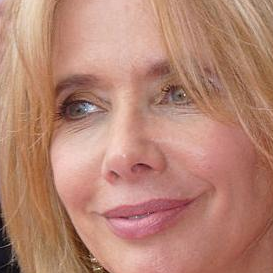

In [31]:
img = Image.open(total_path[0])
img

In [32]:
img.size

(273, 273)

In [33]:
#Vamos agora desenhar uma função para obter o tamanho de todas as imagens

In [34]:
def getsize(path):
    img = Image.open(path)
    return img.size[0]  ##só precisamos de size[0] por ser uma imagem quadrada o x e y seram iguais por isso é irrelevante ter ambos

In [35]:
getsize(total_path[0])

273

## Vamos criar uma dataframe para guardar-mos o size o path de cada imagem de forma a começarmos a estudar as imagens

In [36]:
df = pd.DataFrame(data = total_path, columns = ['path'])
df.head()

,path
0,../raw_data/crop/female_crop\female_0.png
1,../raw_data/crop/female_crop\female_1.png
2,../raw_data/crop/female_crop\female_100.png
3,../raw_data/crop/female_crop\female_1003.png
4,../raw_data/crop/female_crop\female_1008.png


In [37]:
df['size'] = df['path'].apply(getsize)

In [38]:
df.head()

,path,size
0,../raw_data/crop/female_crop\female_0.png,273
1,../raw_data/crop/female_crop\female_1.png,182
2,../raw_data/crop/female_crop\female_100.png,182
3,../raw_data/crop/female_crop\female_1003.png,182
4,../raw_data/crop/female_crop\female_1008.png,81


In [39]:
df.tail()

,path,size
6053,../raw_data/crop/male_crop\male_989.png,182
6054,../raw_data/crop/male_crop\male_99.png,273
6055,../raw_data/crop/male_crop\male_991.png,182
6056,../raw_data/crop/male_crop\male_995.png,182
6057,../raw_data/crop/male_crop\male_999.png,273


## Agora vamos Começar com EDA (Exploratory Data Analysis)

In [40]:
df.describe()

,size
count,6058.000000
mean,154.193793
std,71.422258
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


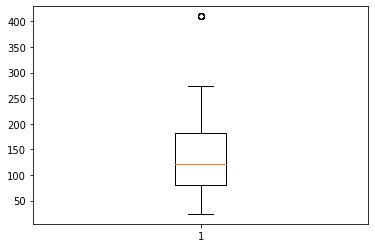

In [41]:
plt.boxplot(df['size'])
plt.show()

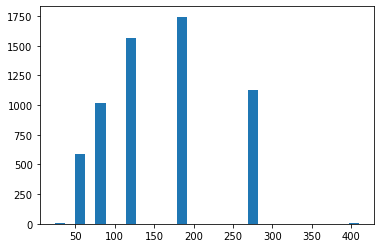

In [42]:
plt.hist(df['size'], bins = 30)
plt.show()

**Da análise concluimos que o melhor caminho será fazer resize das fotos para cerca de 100x100. eliminamos as mais pequenas <50 porque são demasiado pequenas para o modelo aprender detalhe da foto**

In [43]:
len(df['size'] > 60)

6058

In [44]:
df['size'] > 60

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28      False
29       True
        ...  
6028     True
6029     True
6030     True
6031     True
6032     True
6033     True
6034     True
6035     True
6036     True
6037     True
6038     True
6039     True
6040     True
6041    False
6042     True
6043     True
6044     True
6045     True
6046     True
6047     True
6048     True
6049     True
6050    False
6051     True
6052     True
6053     True
6054     True
6055     True
6056     True
6057     True
Name: size, Length: 6058, dtype: bool

In [45]:
df_new = df[df['size'] > 60]

In [46]:
df_new

,path,size
0,../raw_data/crop/female_crop\female_0.png,273
1,../raw_data/crop/female_crop\female_1.png,182
2,../raw_data/crop/female_crop\female_100.png,182
3,../raw_data/crop/female_crop\female_1003.png,182
4,../raw_data/crop/female_crop\female_1008.png,81
5,../raw_data/crop/female_crop\female_1009.png,182
6,../raw_data/crop/female_crop\female_1012.png,273
7,../raw_data/crop/female_crop\female_1014.png,122
8,../raw_data/crop/female_crop\female_1017.png,182
9,../raw_data/crop/female_crop\female_102.png,182


**aqui já eliminamos as fotografias que eram demasiado pequenas para o modelo**

In [47]:
# vamos criar uma coluna como o genero para sabermos mais ou menos que fotos são de que sexo e estudarmos quão balanced é o nosso data

In [48]:
temp = df['path'][6056]
temp

'../raw_data/crop/male_crop\\male_995.png'

In [53]:
temp.split('_')[1].split('/')[2]

'male'

In [56]:
def gender(path):
    return path.split('_')[1].split('/')[2]

In [57]:
df['gender'] = df['path'].apply(gender)

In [58]:
df

,path,size,gender
0,../raw_data/crop/female_crop\female_0.png,273,female
1,../raw_data/crop/female_crop\female_1.png,182,female
2,../raw_data/crop/female_crop\female_100.png,182,female
3,../raw_data/crop/female_crop\female_1003.png,182,female
4,../raw_data/crop/female_crop\female_1008.png,81,female
5,../raw_data/crop/female_crop\female_1009.png,182,female
6,../raw_data/crop/female_crop\female_1012.png,273,female
7,../raw_data/crop/female_crop\female_1014.png,122,female
8,../raw_data/crop/female_crop\female_1017.png,182,female
9,../raw_data/crop/female_crop\female_102.png,182,female


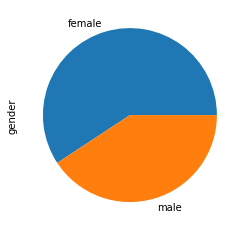

In [59]:
df['gender'].value_counts().plot(kind = 'pie')
plt.show()

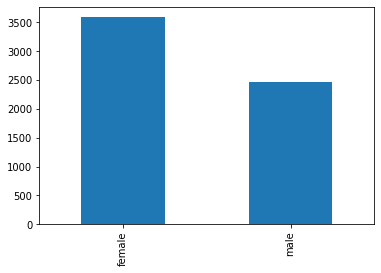

In [60]:
df['gender'].value_counts().plot(kind = 'bar')
plt.show()

In [61]:
df['gender'].value_counts(normalize = 'True')

female    0.592605
male      0.407395
Name: gender, dtype: float64

**de facto existem mais fotografias de mulheres mas não é caso para nos preocuparmos**

In [62]:
df_new['size'].min()

81

**a mais pequena foto que tenho neste momento é 81x81**

**vamos então fazer resize das fotos todas para 100x100**

## Vamos fazer resize das imagens para tamanho 100x100

In [63]:
path_to_resize = df['path'][0]
#1º passo - ler imagem
img = cv2.imread(path_to_resize)
#2º passo - converter para grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#3º passo - redimensionar para 100x100
size = gray.shape[0]
if size >= 100:
    gray_resize = cv2.resize(gray,(100,100), cv2.INTER_AREA) #diminuir a imagem no caso a imagem ser maior que 100x100
else:
    gray_resize = cv2.resize(gray, (100,100), cv2.INTER_CUBIC) #aumentar a imagem no caso da imagem ser menor que 100x100
#4º passo - temos de flatten a imagem(1x10000) para a imagem ficar resumida a 10000 colunas
flat_img = gray_resize.flatten()

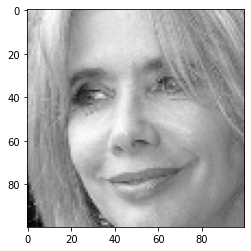

In [64]:
plt.imshow(gray_resize, cmap = 'gray')

**portanto temos em cima os passos que temos que tomar. agora basta colocá-los todos numa função**

In [65]:
def resize_img(path_to_resize):
    img = cv2.imread(path_to_resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    size = gray.shape[0]
    if size >= 100:
        gray_resize = cv2.resize(gray,(100,100), cv2.INTER_AREA) 
    else:
        gray_resize = cv2.resize(gray, (100,100), cv2.INTER_CUBIC) 
    flat_img = gray_resize.flatten()
    return flat_img 

In [66]:
len(resize_img(path_to_resize))

10000

**podemos ver em cima que tudo está a funcionar como deve**

In [67]:
df_new['gender'] = df_new['path'].apply(gender)

c:\users\liamc\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_new

,path,size,gender
0,../raw_data/crop/female_crop\female_0.png,273,female
1,../raw_data/crop/female_crop\female_1.png,182,female
2,../raw_data/crop/female_crop\female_100.png,182,female
3,../raw_data/crop/female_crop\female_1003.png,182,female
4,../raw_data/crop/female_crop\female_1008.png,81,female
5,../raw_data/crop/female_crop\female_1009.png,182,female
6,../raw_data/crop/female_crop\female_1012.png,273,female
7,../raw_data/crop/female_crop\female_1014.png,122,female
8,../raw_data/crop/female_crop\female_1017.png,182,female
9,../raw_data/crop/female_crop\female_102.png,182,female


**vamos aplicar agora a função à dataframe**

In [69]:
df_new['resized_images'] = df_new['path'].apply(resize_img)

c:\users\liamc\.venvs\lewagon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_new

,path,size,gender,resized_images
0,../raw_data/crop/female_crop\female_0.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,../raw_data/crop/female_crop\female_1.png,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,../raw_data/crop/female_crop\female_100.png,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,../raw_data/crop/female_crop\female_1003.png,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,../raw_data/crop/female_crop\female_1008.png,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."
5,../raw_data/crop/female_crop\female_1009.png,182,female,"[81, 80, 83, 79, 74, 68, 64, 55, 55, 56, 60, 5..."
6,../raw_data/crop/female_crop\female_1012.png,273,female,"[69, 66, 67, 67, 68, 66, 67, 67, 65, 71, 79, 8..."
7,../raw_data/crop/female_crop\female_1014.png,122,female,"[183, 170, 173, 161, 88, 27, 20, 6, 2, 15, 5, ..."
8,../raw_data/crop/female_crop\female_1017.png,182,female,"[31, 33, 37, 30, 30, 31, 29, 34, 29, 28, 31, 3..."
9,../raw_data/crop/female_crop\female_102.png,182,female,"[126, 128, 128, 128, 126, 127, 127, 128, 128, ..."


## Agora vamos criar uma dataframe apenas com os valores das imagens com tamanho correto e usar cada valor do array como valor de coluna

In [71]:
df_info_img = df_new['resized_images'].apply(pd.Series)
df_info_img

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188,180,184,188,173,179,192,178,216,219,...,109,111,115,116,122,116,119,120,117,111
1,32,24,32,27,29,29,29,32,36,30,...,58,47,27,33,22,28,22,36,62,17
2,22,30,39,36,30,61,11,17,10,19,...,156,171,177,186,176,185,186,190,177,177
3,35,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,86,86,71,54,45,49,33,20,18,23,...,35,34,32,32,30,32,34,34,33,30
5,81,80,83,79,74,68,64,55,55,56,...,115,129,151,148,149,150,153,151,155,148
6,69,66,67,67,68,66,67,67,65,71,...,95,94,93,93,92,91,88,88,81,82
7,183,170,173,161,88,27,20,6,2,15,...,186,188,189,188,185,186,187,191,190,189
8,31,33,37,30,30,31,29,34,29,28,...,37,33,35,42,43,38,34,35,34,34
9,126,128,128,128,126,127,127,128,128,128,...,119,117,110,110,115,92,117,196,111,153


**não esquecer de adicionar a etiqueta de cada imagem associada ao sexo da pessoa**

In [72]:
df_info_img = pd.concat((df_new['gender'], df_info_img), axis = 1)

In [73]:
df_info_img.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


**só para confirmar que não perdemos informação vamos mostrar como podemos montar a imagem de novo mesmo tendo a informação espalhada**

In [74]:
df_info_img.loc[0][1:] #esta info compoe uma imagem referente à primeira linha da tabela

0       188
1       180
2       184
3       188
4       173
5       179
6       192
7       178
8       216
9       219
10      218
11      214
12      215
13      209
14      201
15      199
16      166
17      167
18      169
19      143
20      140
21      101
22      122
23      119
24      132
25      137
26      143
27      154
28      156
29      166
       ... 
9970    125
9971    121
9972    121
9973    114
9974    115
9975    115
9976    115
9977    114
9978    113
9979    112
9980    114
9981    112
9982    110
9983    112
9984    110
9985    114
9986    111
9987    109
9988    108
9989    107
9990    109
9991    111
9992    115
9993    116
9994    122
9995    116
9996    119
9997    120
9998    117
9999    111
Name: 0, Length: 10000, dtype: object

In [75]:
df_info_img.loc[0][1:].values.reshape(100,100).astype('int') #temos de converter os valores para 100x100 e depois de object para inteiros para poder desenhar

array([[188, 180, 184, ..., 148, 130, 162],
       [170, 176, 176, ..., 157, 142, 125],
       [160, 163, 178, ..., 141, 169, 128],
       ...,
       [ 34,  44,  17, ..., 118, 119, 114],
       [ 18,  16,  25, ..., 113, 112, 110],
       [ 25,  22,  32, ..., 120, 117, 111]])

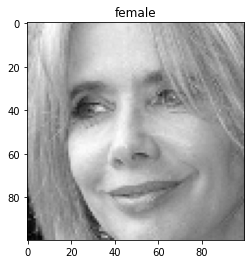

In [76]:
plt.imshow(df_info_img.loc[0][1:].values.reshape(100,100).astype('int'), cmap ='gray')
plt.title(df_info_img.loc[0]['gender'])
plt.show()

Portanto temos aqui a imagem na mesma, toda a informação continua no sitio.

## Por ultimo vamos guardar esta df num pickle para podermos acede-lo sem correr todas estas linhas

In [77]:
import pickle
pickle.dump(df_info_img, open('../raw_data/model&pickles/dataframe_images_100_100.pickle', 'wb'))

# Agora que temos data pronto vamos fazer limpeza para podermos construir modelo!

In [78]:
#Vamos buscar o ficheiro onde guardamos a dataframe com a info direito

In [80]:
df = pickle.load(open('../raw_data/model&pickles/dataframe_images_100_100.pickle', 'rb'))

In [81]:
df

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30
5,female,81,80,83,79,74,68,64,55,55,...,115,129,151,148,149,150,153,151,155,148
6,female,69,66,67,67,68,66,67,67,65,...,95,94,93,93,92,91,88,88,81,82
7,female,183,170,173,161,88,27,20,6,2,...,186,188,189,188,185,186,187,191,190,189
8,female,31,33,37,30,30,31,29,34,29,...,37,33,35,42,43,38,34,35,34,34
9,female,126,128,128,128,126,127,127,128,128,...,119,117,110,110,115,92,117,196,111,153


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5462 entries, 0 to 6057
Columns: 10001 entries, gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 52.2+ MB


In [83]:
#vamos verificar se existe valores em falta
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
         ..
9970      0
9971      0
9972      0
9973      0
9974      0
9975      0
9976      0
9977      0
9978      0
9979      0
9980      0
9981      0
9982      0
9983      0
9984      0
9985      0
9986      0
9987      0
9988      0
9989      0
9990      0
9991      0
9992      0
9993      0
9994      0
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

## Data Preprocessing
- Remover valores em falta
- normalizar os valores

In [71]:
df.dropna(axis=0, inplace = True)

In [72]:
df.isnull().sum()

gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

In [73]:
# vamos criar os nossos features e o que queremos prever

In [84]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [85]:
x.shape,y.shape

((5462, 10000), (5462,))

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x) #aqui estamos a normalizar data 

In [87]:
x_norm

array([[0.7372549 , 0.70588235, 0.72156863, ..., 0.47058824, 0.45882353,
        0.43529412],
       [0.1254902 , 0.09411765, 0.1254902 , ..., 0.14117647, 0.24313725,
        0.06666667],
       [0.08627451, 0.11764706, 0.15294118, ..., 0.74509804, 0.69411765,
        0.69411765],
       ...,
       [0.11764706, 0.11764706, 0.11764706, ..., 0.4627451 , 0.5372549 ,
        0.52941176],
       [0.08235294, 0.10588235, 0.12156863, ..., 0.07843137, 0.08627451,
        0.09803922],
       [0.01568627, 0.01176471, 0.00784314, ..., 0.35294118, 0.35294118,
        0.36470588]])

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y) #aqui estamos a transformar data de categorico para numerico para o modelo treinar melhor

In [89]:
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [90]:
x_norm.shape

(5462, 10000)

In [91]:
y_encoded.shape

(5462,)

## Transfromar a informação em eigen Values para tratar desta questão

In [92]:
x_new = x_norm - x_norm.mean(axis=0)

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
x_pca = pca.fit_transform(x_new)

**vamos usar pca para determinar as colunas mais importantes as que explicam melhor o resultado que queremos prever**

In [108]:
#na verdade pca ajuda-nos a fazer uma redução da dimensão dos dados. 10000 colunas são demasiadas para um modelo ser treinado
#por isso corremos um modelo pca para fazer uma seleção dos dados mais importantes que expliquem os resultados

In [94]:
x_pca.shape

(5462, 5462)

In [95]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

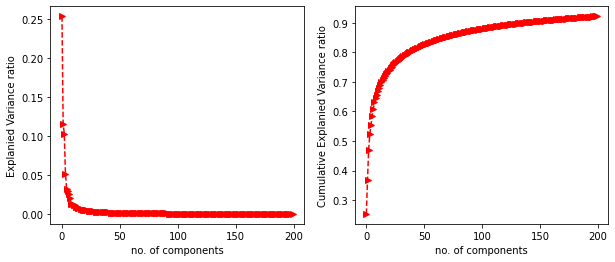

In [96]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

**usando o método do cotovelo podemos considerar que cerca de 25-30 componentes chegam para explicar 70% dos dados, se queremos pelo menos 80% vamos optar por pelo menos 50 componentes.**

In [97]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(x_new)

In [98]:
x_pca_50.shape

(5462, 50)

In [99]:
import pickle
pickle.dump(pca_50,open('../raw_data/model&pickles/pca_50.pickle','wb')) #vamos guardar o nosso pca para usarmos para o nosso modelo

## Vamos desenhar agora as eigen images para vermos os 50 componentes que foram escolhidos dos 10000

In [100]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [101]:
x_pca_inv.shape

(5462, 10000)

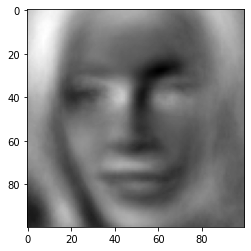

In [102]:
# consider one image (one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

In [103]:
# temos em cima os 50 componentes que foram escolhidos pelo pca como essenciais para acertar no sexo

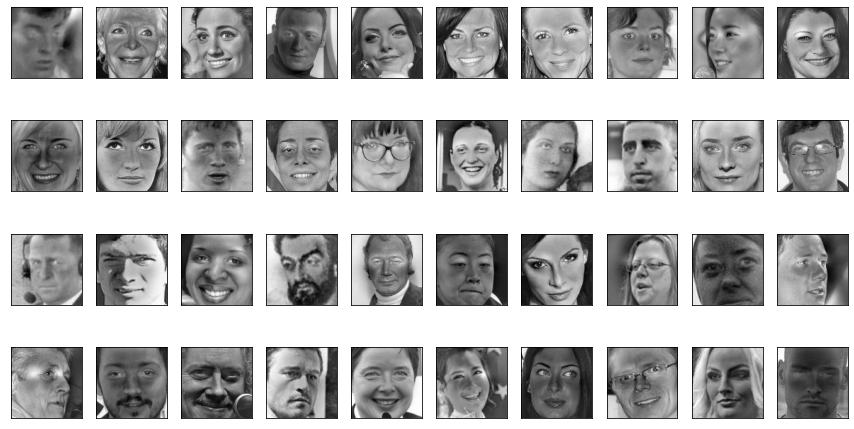

====================Eigen Images====================


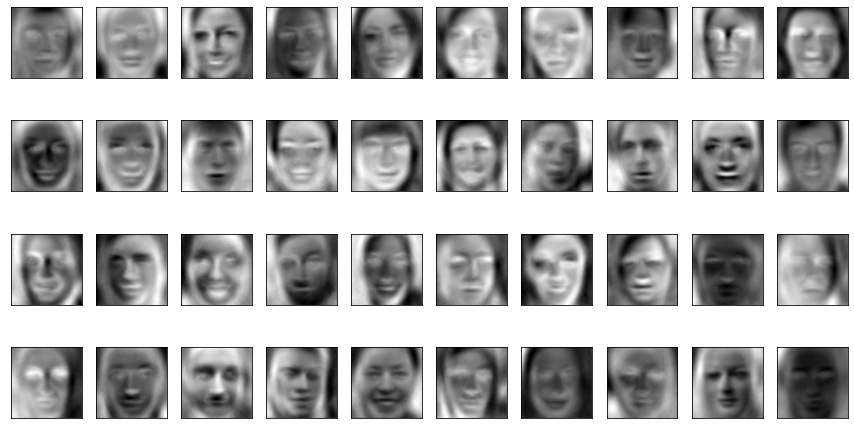

In [104]:
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_new[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')

    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')

    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [105]:
# saving 
np.savez('../raw_data/model&pickles/data_pca_50_y_mean.pickle',x_pca_50,y_encoded,x_norm.mean(axis=0))

# Hora de construir o modelo !

In [106]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [107]:
ls

 Volume in drive C is Windows
 Volume Serial Number is BCBE-FE20

 Directory of C:\Users\liamc\code\Gender_Identifier\notebooks

07/03/2021  12:38    <DIR>          .
07/03/2021  12:38    <DIR>          ..
07/03/2021  11:31    <DIR>          .ipynb_checkpoints
19/02/2021  15:11                 0 .keep
20/02/2021  22:27            20Â 250 debug.log
07/03/2021  12:21           129Â 401 f_01.png
07/03/2021  12:38         2Â 529Â 720 Liam projeto estÃ¡ aqui.ipynb
20/02/2021  22:27         4Â 003Â 189 Module-01-01-Understanding Images.ipynb
20/02/2021  22:27           102Â 634 Module-01-02-Values or Pixles.ipynb
20/02/2021  22:27           242Â 665 Module-01-03-Resize.ipynb
20/02/2021  22:27           182Â 150 Module-01-04-Object Detection (face).ipynb
20/02/2021  22:27             2Â 917 Module-01-05-Videos.ipynb
20/02/2021  22:27         1Â 145Â 447 Module-2- 01-Image Croping.ipynb
20/02/2021  22:27            76Â 401 Module-2- 02-Structuring Data.ipynb
20/02/2021  22:27            13Â 24

In [108]:
data = np.load('../raw_data/model&pickles/data_pca_50_y_mean.pickle.npz')

In [109]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [110]:
x = data['arr_0']
y_enc = data['arr_1']
mean = data['arr_2']

## Separar data em training e test

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y_enc,test_size=0.2,stratify=y_enc)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4369, 50), (1093, 50), (4369,), (1093,))

## Treinar modelo SVM

In [112]:
from sklearn.svm import SVC

model = SVC(C=1.0,kernel='rbf',gamma=0.01, probability = True)
model.fit(x_train,y_train)

model.score(x_train,y_train)

0.8631265735866331

In [113]:
model.score(x_test,y_test)

0.8014638609332113

## Avaliação do modelo
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

### Confusion matrix

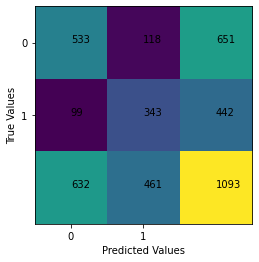

In [114]:
from sklearn import metrics
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Classification report

In [115]:
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,f1-score,precision,recall,support
male,0.830865,0.843354,0.818740,651.000000
female,0.759690,0.744035,0.776018,442.000000
accuracy,0.801464,0.801464,0.801464,0.801464
macro avg,0.795278,0.793695,0.797379,1093.000000
weighted avg,0.802082,0.803190,0.801464,1093.000000


### Kappa Score

In [116]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5906826241899716

**in essence, the kappa statistic is a measure of how closely the instances classified by the machine learning classifier matched the data labeled as ground truth controlling for the accuracy of a random classifier as measured by the expected accuracy.**

**para um bom modelo kappa tem de ser superior a 60% por isso vamos ter que melhorar o modelo**
- abaixo de 20% nao é usavel
- acima de 80% é perfeito

### ROC & AUC

**AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.**

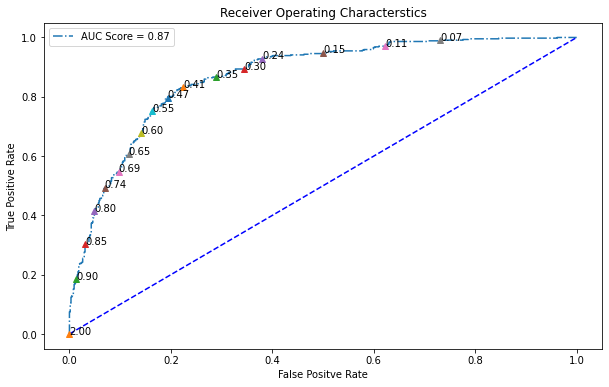

In [117]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

Deste gráfico o que dá para observar é o que acontece à **TPR** (True positive Rate) e à **FPR** (False Positive Rate) mudando o "Treshold" do modelo. Por exemplo, se escolhermos um treshold de 0.87 o **TPR** seria de 0.2-0.3 e o **FPR** seria de 0-0.5. Já se escolhessemos o treshold de 0.44, o **TPR** será +-0.8 e o **FPR** de +-0.18

# Agora que temos um modelo que é bom vamos melhorá-lo

## Hyper parameter tuning

In [118]:
from sklearn.model_selection import GridSearchCV

model = SVC()

parameters = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }

model_grid = GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=5,verbose=1)

model_grid.fit(x,y_enc)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 14.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [119]:
model_grid.best_params_

{'C': 20, 'coef0': 1, 'gamma': 0.002, 'kernel': 'poly'}

In [120]:
model_grid.best_score_

0.7868907701021151

In [121]:
best_model = SVC(C=30, kernel='rbf',gamma=0.002, probability = True)

best_model.fit(x_train,y_train)

best_model.score(x_test,y_test)

0.8014638609332113

## Vamos agora guardar o nosso melhor modelo

In [122]:
import pickle
pickle.dump(best_model,open('../raw_data/model&pickles/model_svm.pickle', 'wb'))

## Criar um pipeline para fácil implementação

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn
import cv2

In [2]:
haar = cv2.CascadeClassifier('../raw_data/model&pickles/haarcascade_frontalface_default.xml')

In [3]:
mean = pickle.load(open('../raw_data/model&pickles/mean_preprocess.pickle','rb'))

In [4]:
model_svm = pickle.load(open('../raw_data/model&pickles/model_svm.pickle','rb'))

In [5]:
model_svm

SVC(C=30, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [6]:
model_pca = pickle.load(open('../raw_data/model&pickles/pca_50.pickle', 'rb'))

In [7]:
!ls '../raw_data'

crop
female
male
male_000281.jpg
male_01.png
model&pickles
test.jpg
video.mp4


**vamos ver como tendo uma imagem podemos pedir ao modelo para identificar o género**

In [8]:
gender_pre = ['Male', 'Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [12]:
test_data_path = '../raw_data/male_000281.jpg'
# agora vamos ler a imagem
img = cv2.imread(test_data_path)
color = 'bgr'
#passo 2 é converter a imagem para gray scale
if color == 'bgr':
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#passo 3 é fazer crop à cara usando haard cascate classifier
faces = haar.detectMultiScale(gray,1.5,3)
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255), 2) #desenho do retangulo na cara
    roi = gray[y:y+h, x:x+w] #recorte da imagem
    #agora normalizando a imagem para por os valores entre 0 e 1
    roi = roi / 255.0
    #vamos redimensionar a imagem agora
    if roi.shape[1] > 100:
        roi_resize = cv2.resize(roi, (100,100), cv2.INTER_AREA) #caso em que a imagem é maior e queremos tornar + pequena
    else:
        roi_resize = cv2.resize(roi, (100,100), cv2.INTER_CUBIC) #caso em que a imagem é pequena e queremos aumentar para 100
    #agora é necessário fazer flatten/ ficar com a imagem so numa dimensao
    roi_reshape = roi_resize.reshape(1,-1) # 1 x 10,000
    # subtrair a media (para normalizar)
    roi_mean = roi_reshape - mean
    #obter a eigen image
    eigen_image = model_pca.transform(roi_mean)
    #passar a imagem para o modelo
    results = model_svm.predict_proba(eigen_image)[0] # por a respota vir em array queremos o 1º valor
    predict = results.argmax() # 0 or 1 
    score = results[predict]
    # step -11:
    text = "%s : %0.2f"%(gender_pre[predict],score)
    cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    
cv2.imshow('Gender Prediction', img)
#cv2.waitkey(0)

    

In [10]:
# test data
test_data_path = './data/male_000281.jpg'
color = 'bgr'
# step-1: read image
img = cv2.imread(test_data_path)

def pipeline_model(img,color='rgb'):
    # step-2: convert into gray scale
    if color == 'bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # step-3: crop the face (using haar cascase classifier)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) # drawing rectangle
        roi = gray[y:y+h,x:x+w] # crop image
        # step - 4: normalization (0-1)
        roi = roi / 255.0
        # step-5: resize images (100,100)
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
        # step-6: Flattening (1x10000)
        roi_reshape = roi_resize.reshape(1,10000) # 1,-1
        # step-7: subptract with mean
        roi_mean = roi_reshape - mean
        # step -8: get eigen image
        eigen_image = model_pca.transform(roi_mean)
        # step -9: pass to ml model (svm)
        results = model_svm.predict_proba(eigen_image)[0]
        # step -10:
        predict = results.argmax() # 0 or 1 
        score = results[predict]
        # step -11:
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img

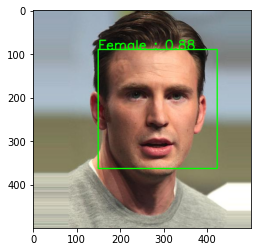

In [11]:
from PIL import Image
import matplotlib.image as mat_image

test_data_path = '../raw_data/male_000281.jpg'
color = 'bgr'
# step-1: read image
img = Image.open(test_data_path) # rgb
# step2: convert into array
img = np.array(img)
# step3: pass to pipeline model
img = pipeline_model(img)
plt.imshow(img)